---

<br />
<br />

# 1.-ANÁLISIS EXPLORATORIO DE DATOS
<br />
<br />

---

Realizemos un análisis exploratorio de datos, cubramos brevemente los pasos del proyecto 01.


## 1.1 Importando Librerías

In [ ]:
#IMPORTANDO MÓDULOS:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Además se establece un estilo de colores para todos los gráficos
plt.style.use('ggplot')
#Para volver a default utilizar lo siguiente:
# plt.rcdefaults()

## 1.2 Cargando dataframe

In [ ]:
#Contactamos con drive:
from google.colab import drive
drive.mount('/content/drive')

#Creamos el DF "ar_properati_db"
ar_properati = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Acamica_Data Science Course/Datasets/DS_Proyecto_01_Datos_Properati.csv')

#Revisamos las primeras 5 instancias:
ar_properati.sample(5)

Mounted at /content/drive


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
80727,2019-08-13,2019-08-14,2019-08-13,-34.596419,-58.388467,Argentina,Capital Federal,Recoleta,1.0,1.0,1.0,33.0,33.0,115000.0,USD,Departamento en venta en Recoleta,Muy buen departamento originalmente de 2 ambie...,Departamento,Venta
51808,2019-03-24,2019-10-08,2019-03-24,-34.452567,-58.565931,Argentina,Bs.As. G.B.A. Zona Norte,San Fernando,8.0,5.0,3.0,190.0,190.0,137000.0,USD,CASA MULTIFAMILIAR LOTE PROPIO VIRREYES,Corredor Responsable: Mario Gabriel Gerez - CM...,Casa,Venta
18103,2019-01-13,2019-01-27,2019-01-13,-34.602115,-58.405980,Argentina,Capital Federal,Almagro,8.0,7.0,1.0,180.0,180.0,309000.0,USD,Depto.tipo casa de 8 ambientes en Venta en Alm...,Departamento tipo casa a reciclar primer piso ...,PH,Venta
11409,2019-11-19,2019-12-03,2019-11-19,-34.605265,-58.424579,Argentina,Capital Federal,Almagro,2.0,1.0,1.0,45.0,35.0,94000.0,USD,Departamento de 2 ambientes en Venta en Almagro,"Lindo departamento de 3 ambientes, con balcon ...",Departamento,Venta
15270,2020-01-19,2020-01-21,2020-01-19,-34.540327,-58.542329,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,2.0,1.0,61.0,54.0,65000.0,USD,Depto venta 3 amb SIN EXPENSAS - Villa Ballester,Corredor Responsable: Gabriel Sola - CUCICBA 2...,Departamento,Venta


## 1.3 Revisando dataframe

In [ ]:
# REVISANDO EL DATA FRAME CON INFO():
ar_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

La función Info muestra cantidad de instancias y columnas:\
**146660 instancias y 19 Columnas**

Además muestra nombres de las columnas y tipo de dato de cada una.

La categoría "Non-Null Count" ya da una muestra de cuales columnas tienen valores nulos. En este caso, son aquellos que no completan los 146660 registros.

Revisemos los valores únicos de cada columna...


In [ ]:
# REVISANDO EL DATA FRAME CON UNIQUE():
unique = ar_properati.nunique()
unique

start_date            366
end_date              412
created_on            366
lat                 59636
lon                 60075
l1                      1
l2                      4
l3                     89
rooms                  25
bedrooms               16
bathrooms              14
surface_total        1843
surface_covered       876
price                6821
currency                1
title               77733
description        106668
property_type          10
operation_type          1
dtype: int64

La función Unique() nos permite identificar cuantos valores distintos hay en cada columna. Esta información, a parte del razonamiento lógico, ayudar a tener una idea de cuales variables pueden ser tratadas como categóricas y cuales como numéricas. Para continuación del proyecto se considera como relevante lo siguiente:


Categóricas (6 columnas):\
-l2 (Región)\
-l3 (Barrio)\
-rooms (Espacios)\
-bathrooms (Baños) \
-bedroms (Dormitorios)\
-property_type (Tipo de propiedad)\
 \


Numéricas (5 columnas):\
-lat (Latitud)\
-lon (Longitud)\
-surface_total(Superficie Total)\
-surface_covered (Superficie Cubierta)\
-price (Precio)

Con el siguiente código revisemos aquellas categorías que tienen un sólo valor único (país, moneda y tipo de operación). Las cuales no se incluirán en los estudios de distribución ya que son únicas y no afectan el comportamiento del resto del dataset por no tener variación.


In [ ]:
#IDENTIFICANDO COLUMNAS CON UN SOLO VALOR ÚNICO:
uniqueValues_l1 = ar_properati['l1'].unique()
print('l1: ', uniqueValues_l1)

uniqueValues_currency = ar_properati['currency'].unique()
print('currency: ', uniqueValues_currency)

uniqueValues_operation_type = ar_properati['operation_type'].unique()
print('operation_type: ', uniqueValues_operation_type)

l1:  ['Argentina']
currency:  ['USD']
operation_type:  ['Venta']


Las columnas restantes, a saber:\
-start_date (fecha de inicio)\
-end_date (fecha fin)\
-created_on (fecha de creación)\
-title (título)\
-description (descripción)

... No se tomarán en cuenta en la continuación del proyecto por considerar que no son necesarias. Sin embargo, en caso ver alguna opción de incluirlas se puede recurrir al dataset original (ar_properati).

## 1.4 Estudiando valores faltantes

Se crea un código para revisar cuales columnas tienen valores nulos y cuanto es la cantidad de estas instancias en cada caso.

In [ ]:
#IDENTIFICANDO VALORES FALTANTES:

#Realizamos sumatoria de todas las instancias nulas en cada columna, además se almacenan solo aquellas que tienen nulos, de esto resulta una serie:
ar_properati_nulos = ar_properati.isnull().sum().sort_values(ascending =False)[ar_properati.isnull().sum()>0]
# print(type(ar_properati_nulos)) #codigo de chequeo

#Convertimos la serie en dataframe
ar_properati_nulos_df = pd.DataFrame({'Nombre_de_columna_con_Nulos':ar_properati_nulos.index,'Cant_de_Nulos':ar_properati_nulos.values})

#Almacenamos la cantidad de filas totales del dataframe:
filas = ar_properati.shape[0]
print("La cantidad de instancias (filas) totales es de %i."%(filas))

# print("Cantidad de nulos por columnas y el porcentaje que re presentan:")
ar_properati_nulos_df['% de Nulos'] = round(((ar_properati_nulos_df.Cant_de_Nulos/filas)*100),2)
ar_properati_nulos_df

La cantidad de instancias (filas) totales es de 146660.


,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos
0,surface_covered,21614,14.74
1,surface_total,20527,14.00
2,lon,9959,6.79
3,lat,9925,6.77
4,bathrooms,5957,4.06


Los nulos en Longitud, Latitud y Baños son menos del 10% del dataset, por otro lado, las superficies tienen un 14% de valores nulos, esto será tratado en la siguiente sección.

## 1.5 Identificando tipos de propiedades

Imprimamos una lista de tipos de propiedad...

In [ ]:
#IDENTIFICANDO TIPOS DE PROPIEDAD:

#Revisamos cuales son los tipos de propiedad con la funcion unique()
uniqueValues_property_type = ar_properati['property_type'].unique()
x = np.sort(uniqueValues_property_type)
print('Tipos de Propiedad: ', x) #código de chequeo

#Convertimos el arreglo numpy en dataframe
uniqueValues_property_type_df = pd.DataFrame({'Tipo de Propiedad':x})
uniqueValues_property_type_df

Tipos de Propiedad:  ['Casa' 'Casa de campo' 'Cochera' 'Departamento' 'Depósito'
 'Local comercial' 'Lote' 'Oficina' 'Otro' 'PH']


,Tipo de Propiedad
0,Casa
1,Casa de campo
2,Cochera
3,Departamento
4,Depósito
5,Local comercial
6,Lote
7,Oficina
8,Otro
9,PH


Se observan 10 tipos de propiedades, veamos las cantidades de cada una...

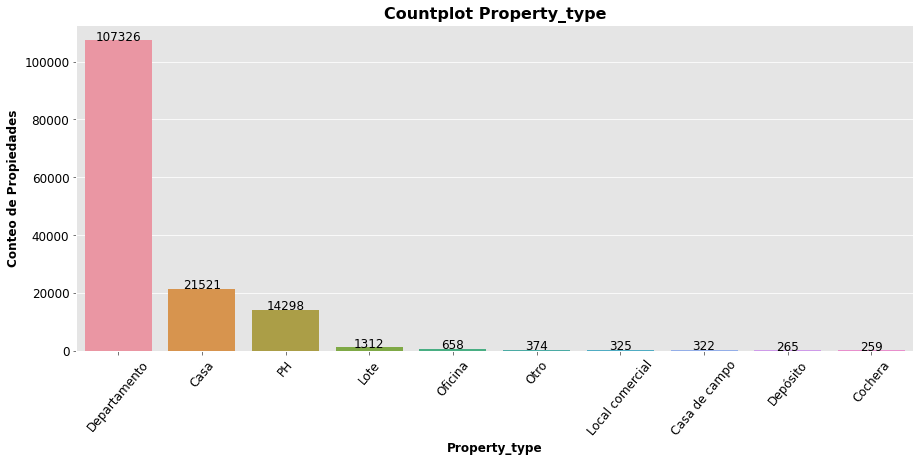

In [ ]:
#GRAFICANDO CONTEO POR TIPO DE PROPIEDAD:

#Definamos un nombre genérico para el dataframe y la columna a evaluar:
df = ar_properati
column_name = 'property_type'

#Usemos el gráfico Countplot:
plt.figure(figsize=(15,6))
ax = sns.countplot(x=df[column_name], order=df[column_name].value_counts().index)

#Agregando titulo
ax.set_title('Countplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")

#Personalizando fuente de ejes
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=50)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black", rotation=0)

#Personalizando  limites de ejes
# ax.set_xlim([0,600000])
# ax.set_ylim([0,50000])

#Configurando los valores de las barras:
labels=df[column_name].value_counts().index
values=df[column_name].value_counts().values
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., 
    height + 0.1, values[i], 
    ha="center", 
    color='black', 
    size=12, 
    rotation=00)

plt.show()

Por lejos, los apartamentos son los tipos de publicaciones mas abundantes, lo que se espera en una ciudad con muchos edificios como lo es Buenos Aires.\
Calculemos cuanto porcentaje representan los tres mas abundantes...

In [ ]:
#CALCULANDO CUANTO REPRESENTAN LOS TRES TIPOS MAS ABUNDANTES:

#Creamos una variable que cuente cada tipo:
Departamento_count = ar_properati.loc[ar_properati.property_type == ('Departamento'), 'property_type'].count()
Casa_count = ar_properati.loc[ar_properati.property_type == ('Casa'), 'property_type'].count()
PH_count = ar_properati.loc[ar_properati.property_type == ('PH'), 'property_type'].count()

#Calculamos el porcentaje en base a las filas totales de dataframe
Dep_Casa_PH = ((Departamento_count + Casa_count + PH_count)/filas)*100
print('Los tres mas abundante representan el', round(Dep_Casa_PH,2), '% de las instancias totales')


Los tres mas abundante representan el 97.6 % de las instancias totales


De lo anterior se puede ver como los tipos de propiedades mas abundantes son Departamento, Casa y PH, abarcando un 97% de toda la data.

Revisemos Zonas (l2) y Barrios (l3)

Grafiquemos el conteo por regiones y barrios...

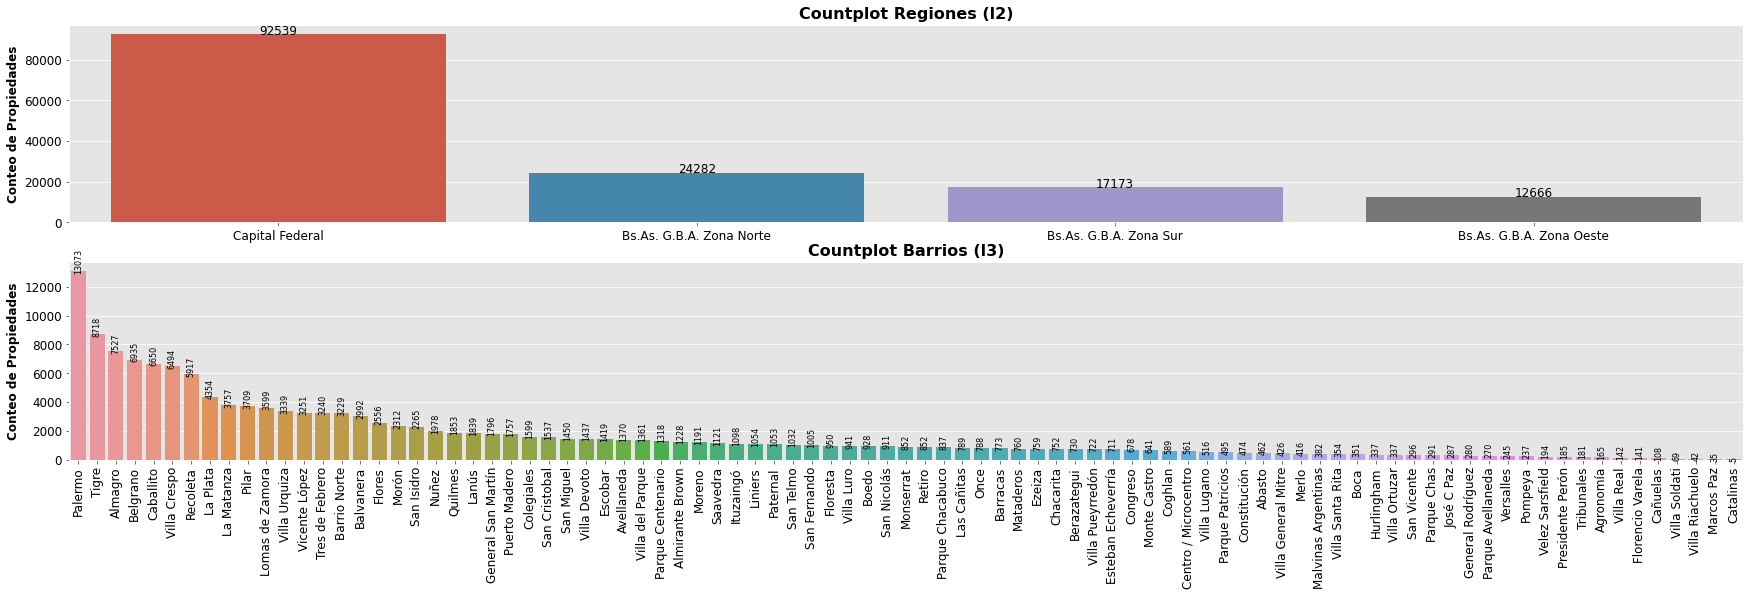

In [ ]:
#PLOTEANDO L2 y L3:

#Definamos un nombre genérico para el dataframe:
df = ar_properati

#Definamos el tamaño del gráfico:
plt.figure(figsize=(30,8))

#*********************************************************************************************************************************************
#Plot - l2 (Región):
column_name = 'l2'
plt.subplot(2,1,1)
ax1 = sns.countplot(x=df[column_name], order=df[column_name].value_counts().index)
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="white")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black", rotation=0)
# ax1.set_xlim([0,600000])
# ax1.set_ylim([0,600000])
ax1.set_title('Countplot Regiones (l2)', fontweight ="bold", fontsize=16, color="black")
#Para ver los valores dentro de la barra:
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()+0.3), ha='center', va='top', color='black', size=12, rotation=00)
#Para ver los valores arriba de la barra:
labels=df[column_name].value_counts().index
values=df[column_name].value_counts().values
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, values[i], ha="center", color='black', size=12, rotation=00)

#*********************************************************************************************************************************************

#Plot - l3 (Barrios):
column_name = 'l3'
plt.subplot(2,1,2)
ax2 = sns.countplot(x=df[column_name], order=df[column_name].value_counts().index)
plt.xlabel('Regiones', fontweight ="bold", fontsize=10, color="white")
plt.xticks(fontsize=12, color="black", rotation=90)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black", rotation=0)
# ax2.set_xlim([0,600000])
# ax2.set_ylim([0,600000])
ax2.set_title('Countplot Barrios (l3)', fontweight ="bold", fontsize=16, color="black")
#Para ver los valores dentro de la barra:
# for p in ax2.patches:
#     ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()+0.3), ha='center', va='top', color='black', size=12, rotation=00)
#Para ver los valores arriba de la barra:
labels=df[column_name].value_counts().index
values=df[column_name].value_counts().values
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 0.1, values[i], ha="center", color='black', size=8, rotation=90)


plt.show()

Se observan claramente 4 regiones.\
Contemos zonas y barrios a continuación...

In [ ]:
#IDENTIFICANDO TIPOS DE PROPIEDAD:

#Calculando cantidad de barrios
uniqueValues_l2 = ar_properati['l2'].unique()
l2_unique = np.sort(uniqueValues_l2)
# #Convertimos el arreglo numpy en dataframe
uniqueValues_property_type_df = pd.DataFrame({'Regiones (l2)':l2_unique})
print('Regiones: ',(uniqueValues_property_type_df.shape[0]))

#Calculando cantidad de barrios
uniqueValues_l3 = ar_properati['l3'].unique()
l3_unique = np.sort(uniqueValues_l3)
# #Convertimos el arreglo numpy en dataframe
uniqueValues_property_type_df = pd.DataFrame({'Barrios (l3)':l3_unique})
print('Barrios: ',(uniqueValues_property_type_df.shape[0]))

Regiones:  4
Barrios:  89


Se puede observar que existen 4 regiones y 89 barrios, sindo la región de "Capital Federal" y el barrio de "Palermo", respectivamente, los más abundantes.

## 1.6 Filtrando dataset

En base a los pasos anteriores, se prepara un dataset que incluya las columnas de interés...

In [ ]:
ar_properati_2 = ar_properati.drop(columns=['start_date', 'end_date','created_on','l1', 'title', 'description', 'currency', 'operation_type'])
print(ar_properati_2.shape)
ar_properati_2.sample(3)

(146660, 11)


,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
34470,-34.542541,-58.492239,Bs.As. G.B.A. Zona Norte,Vicente López,3.0,2.0,1.0,180.0,150.0,240000.0,PH
5473,-34.405409,-58.729579,Bs.As. G.B.A. Zona Norte,Tigre,4.0,3.0,2.0,700.0,112.0,195000.0,Casa
20720,-34.424678,-58.571124,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,51.0,48.0,124000.0,Departamento


In [ ]:
ar_properati_2.rename({'l2': 'zona', 'l3': 'barrio'}, axis=1, inplace=True)
ar_properati_2.sample(3)

,lat,lon,zona,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
8627,-34.400153,-58.649794,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,93.0,82.0,259000.0,Departamento
51949,-34.423619,-58.578465,Bs.As. G.B.A. Zona Norte,Tigre,4.0,3.0,2.0,135.0,95.0,295000.0,Departamento
116075,-34.693993,NaN,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,3.0,NaN,NaN,175000.0,Casa


## 1.7 Estudiando distribuciones

Estudiando distribuciones de las variables:\
-rooms\
-bedrooms\
-bathrooms\
-surface_total\
-surface_covered\
-price


A continuación se realiza para cada una de las variables un bloquede código que:\
-Grafica la distribución en countplot o histograma, dependiendo si la variable es categórica o numérica.\
-Acompaña un gráfico boxplot.\
-Calcula algunos percentiles.\
-Estima valores atípicos por tres métodos: desviación standard, rango intercuartílico y percentil 10/90.

Esto permitirá tener una perspectva más abierta para entender mejor la variable en cuestión.

### *Rooms*

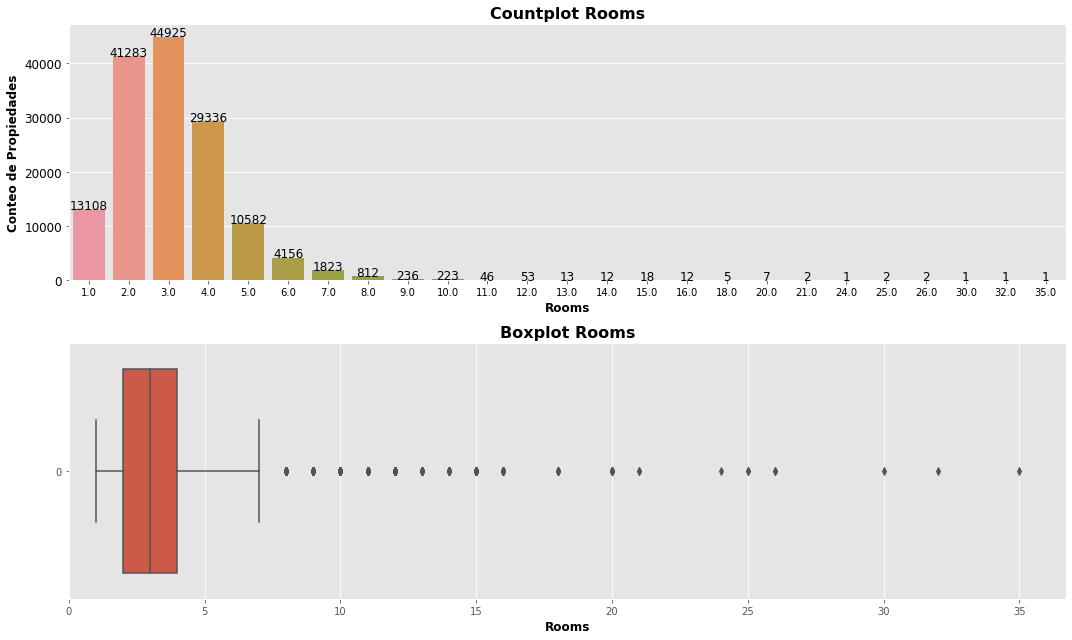

Evaluando: Rooms
Outlier Z-Score Inf/Sup=  -1 / 7
Outlier IQR Inf/Sup=  -1 / 7
Outlier 10/90 Inf/Sup =  2 / 5
count    146660.000000
mean          3.079817
std           1.416352
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          35.000000
Name: rooms, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: ROOMS
#Variable Categórica, Countplot
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'rooms'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,9))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.countplot(x=df[column_name])
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=10, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black", rotation=0)
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax.set_xlim([0,600000])
# ax1.set_ylim([0,600000])
ax1.set_title('Countplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
#Para ver los valores arriba de la barra:
labels=df[column_name].value_counts().index
values=df[column_name].value_counts().values[np.argsort(labels)]
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, values[i], ha="center", color='black', size=12, rotation=00)


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
ax2.set_xlim([0,None])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup= ", '{:.0f}'.format(lowest_allowed), "/" , '{:.0f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup= ",'{:.0f}'.format(lower_limit), "/" , '{:.0f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.0f}'.format(percentile10), "/" , '{:.0f}'.format(percentile90))

print(df[column_name].describe())

ESPACIOS: Se puede observar que la cantidad de rooms mas común es 3 seguido por 2. Ambos métodos de outliers (Z-Score e IQR) recomiendan un máximo de 7 (se ven valores muy puntules de hasta 26 rooms). Por interpretación se considera mínimo valor de 1 room.

### *Bedrooms*

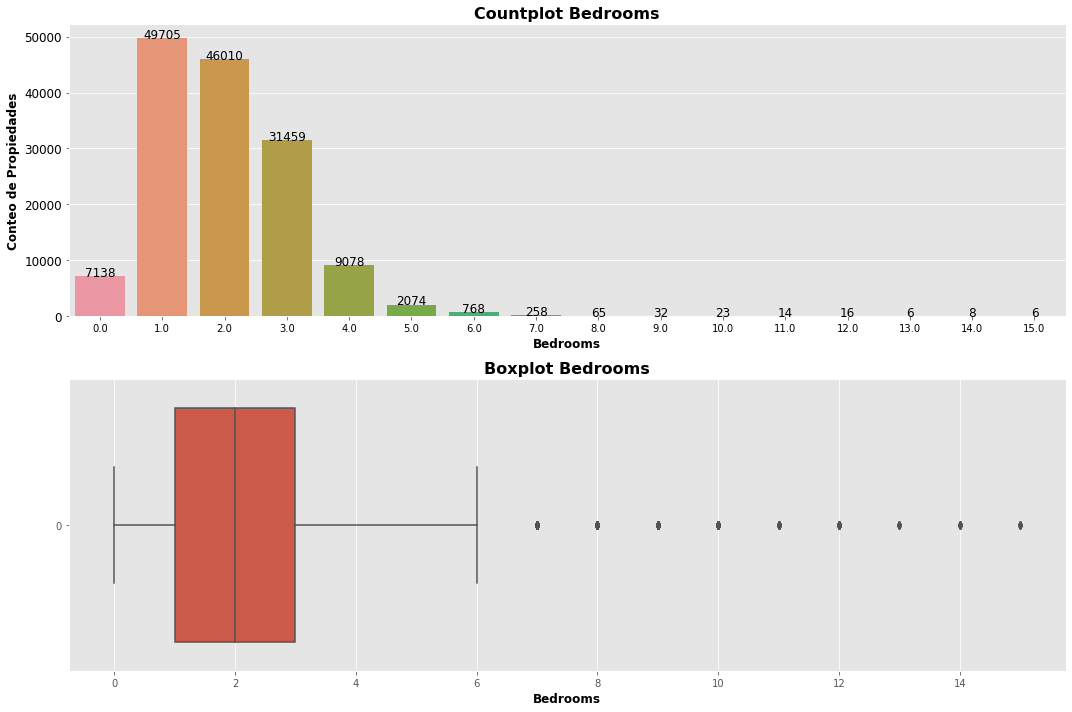

Evaluando: Bedrooms
Outlier Z-Score Inf/Sup =  -1 / 5
Outlier IQR Inf/Sup =  -2 / 6
Outlier 10/90 Inf/Sup =  1 / 3
count    146660.000000
mean          1.983240
std           1.151304
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          15.000000
Name: bedrooms, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: BEDROOMS
#Variable Categórica, Countplot
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'bedrooms'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.countplot(x=df[column_name])
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=10, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black", rotation=0)
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax.set_xlim([0,600000])
# ax1.set_ylim([0,600000])
ax1.set_title('Countplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
#Para ver los valores arriba de la barra:
labels=df[column_name].value_counts().index
values=df[column_name].value_counts().values[np.argsort(labels)]
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, values[i], ha="center", color='black', size=12, rotation=00)


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
# ax2.set_xlim([0,None])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.0f}'.format(lowest_allowed), "/" , '{:.0f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.0f}'.format(lower_limit), "/" , '{:.0f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.0f}'.format(percentile10), "/" , '{:.0f}'.format(percentile90))

print(df[column_name].describe())

DORMITORIOS: Se puede observar que la cantidad de dormitorios más común es 1 seguido por 2. Ambos métodos de outliers (Z-Score e IQR) recomiendan un máximo de 5 a 6 (se ven valores muy puntules de hasta 15), tomaría hasta 6 como outlier superior. Por interpretación se considera mínimo valor de 1 dormitorio.

### *Bathrooms*

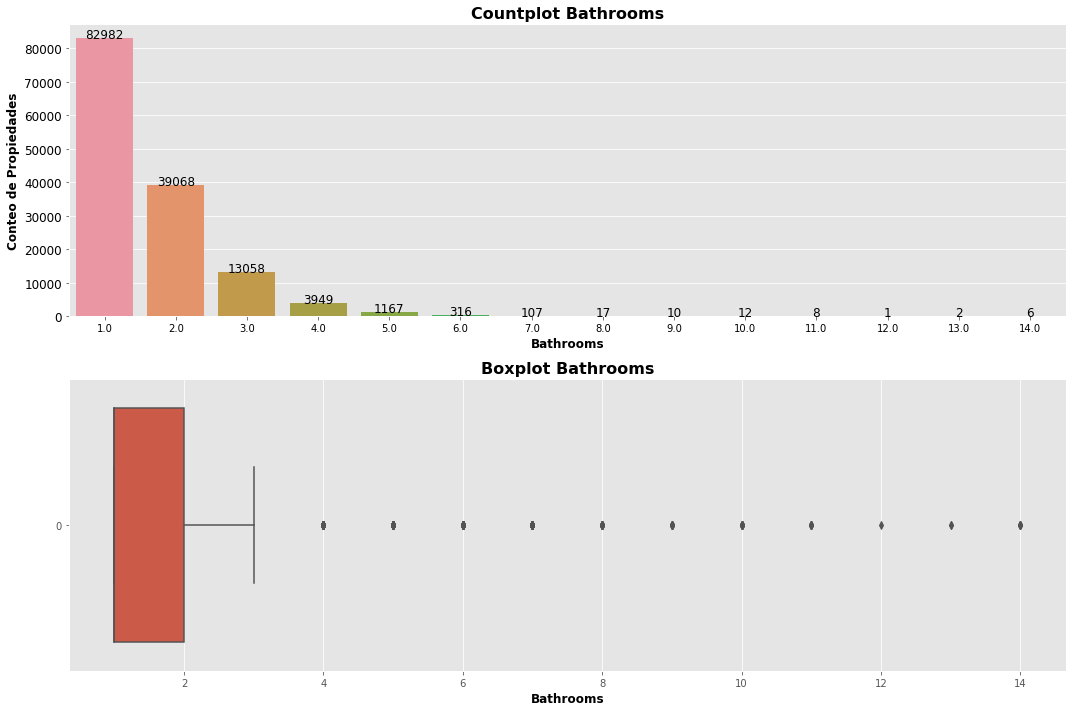

Evaluando: Bathrooms
Outlier Z-Score Inf/Sup =  -1 / 4
Outlier IQR Inf/Sup =  -0 / 4
Outlier 10/90 Inf/Sup =  1 / 3
count    140703.000000
mean          1.599994
std           0.889324
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: BATHROOMS
#Variable Categórica, Countplot
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'bathrooms'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.countplot(x=df[column_name])
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=10, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black", rotation=0)
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax.set_xlim([0,600000])
# ax1.set_ylim([0,600000])
ax1.set_title('Countplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
#Para ver los valores arriba de la barra:
labels=df[column_name].value_counts().index
values=df[column_name].value_counts().values[np.argsort(labels)]
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, values[i], ha="center", color='black', size=12, rotation=00)


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize(), fontweight ="bold", fontsize=12, color="black")
# ax2.set_xlim([0,None])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.0f}'.format(lowest_allowed), "/" , '{:.0f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.0f}'.format(lower_limit), "/" , '{:.0f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.0f}'.format(percentile10), "/" , '{:.0f}'.format(percentile90))

print(df[column_name].describe())

BAÑOS: Se puede observar que la cantidad de baños mas común es 1 seguido por 2. Ambos métodos de outliers (Z-Score e IQR) recomiendan un máximo de 4 (se ven valores muy puntules de hasta 14). Por interpretación se considera mínimo valor de 1 dormitorio.

### *Surface Total*

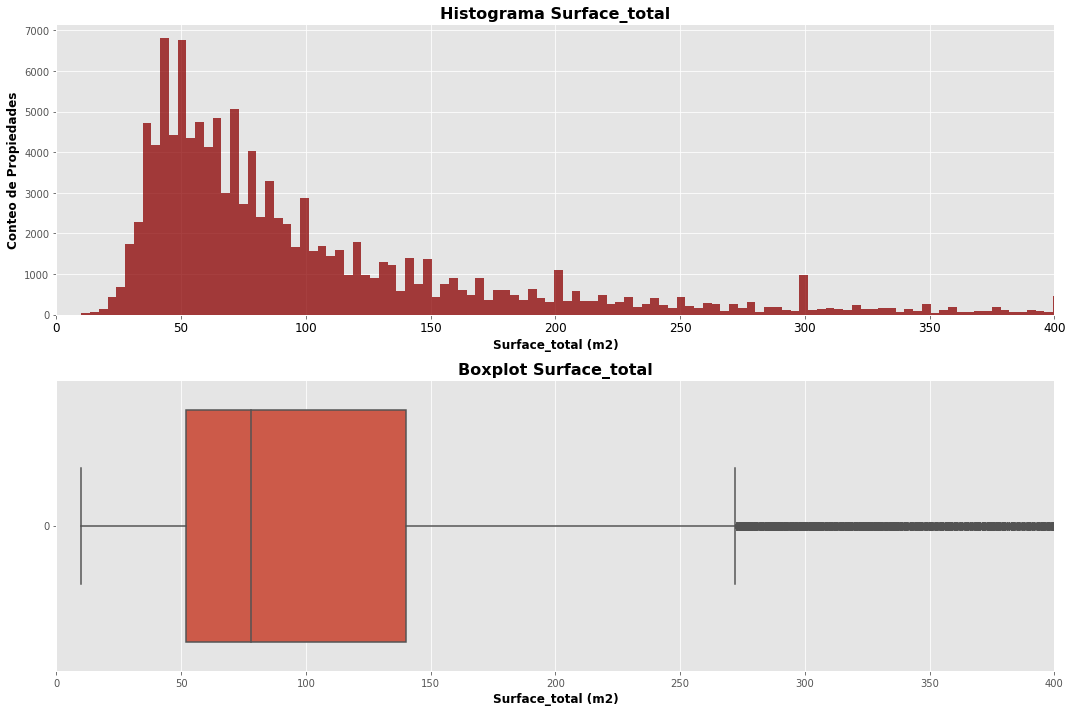

Evaluando: Surface_total
Outlier Z-Score Inf/Sup =  -5896 / 6330
Outlier IQR Inf/Sup =  -80 / 272
Outlier 10/90 Inf/Sup =  40 / 289
count    126133.000000
mean        216.872888
std        2037.606649
min          10.000000
25%          52.000000
50%          78.000000
75%         140.000000
max      193549.000000
Name: surface_total, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: Surface Total
#Variable Numérica, Histograma
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'surface_total'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df[column_name], color='darkred')
plt.xlabel(column_name.capitalize() + ' (m2)', fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.xticks(fontsize=12, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
ax1.set_xlim([0,400])
# ax1.set_ylim([0,600000])
ax1.set_title('Histograma ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize() + ' (m2)', fontweight ="bold", fontsize=12, color="black")
ax2.set_xlim([0,400])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.0f}'.format(lowest_allowed), "/" , '{:.0f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.0f}'.format(lower_limit), "/" , '{:.0f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.0f}'.format(percentile10), "/" , '{:.0f}'.format(percentile90))

print(df[column_name].describe())

SUPERFICIE TOTAL: Se puede observar que la superficie total promedio es de 71 m2, con dispersión a la derecha y sesgo a la izquierda. El outlier por IQR (204 m2) parece ser el más razonable considerando que por Z-Score es muy alto (3055 m2) tratándose de apartamentos y casas. Como valor mínimo se puede tomar el dado por el percentil 10 (39 m2) ya que con los otros dos métodos se tiene valores negativos lo cual es ilógico.

### *Surface Covered*

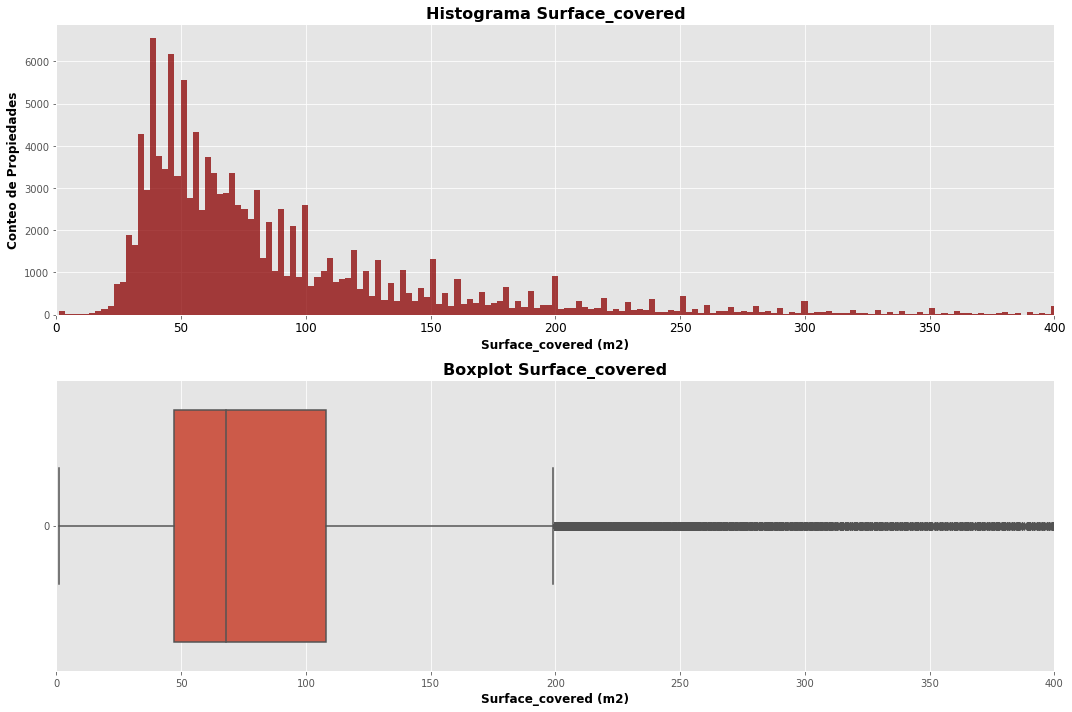

Evaluando: Surface_covered
Outlier Z-Score Inf/Sup =  -2638 / 2863
Outlier IQR Inf/Sup =  -44 / 200
Outlier 10/90 Inf/Sup =  37 / 180
count    125046.000000
mean        112.818011
std         916.857584
min           1.000000
25%          47.000000
50%          68.000000
75%         108.000000
max      126062.000000
Name: surface_covered, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: Surface Covered
#Variable Numérica, Histograma
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'surface_covered'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df[column_name], color='darkred')
plt.xlabel(column_name.capitalize() + ' (m2)', fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.xticks(fontsize=12, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
ax1.set_xlim([0,400])
# ax1.set_ylim([0,600000])
ax1.set_title('Histograma ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize() + ' (m2)', fontweight ="bold", fontsize=12, color="black")
ax2.set_xlim([0,400])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.0f}'.format(lowest_allowed), "/" , '{:.0f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.0f}'.format(lower_limit), "/" , '{:.0f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.0f}'.format(percentile10), "/" , '{:.0f}'.format(percentile90))

print(df[column_name].describe())

SUPERFICIE CUBIERTA: Se puede observar que la superficie total promedio es de 63 m2 (menor a superficie total, siendo lo esperado), con dispersión a la derecha y sesgo a la izquierda, tal como la anterior. El outlier por IQR (174 m2) parece ser el más razonable considerando que por Z-Score es muy alto (2431 m2) tratándose de apartamentos y casas. Como valor mínimo se puede tomar el dado por el percentil 10 (36 m2) ya que con los otros dos métodos se tiene valores negativos lo cual es ilógico.

### *Latitud*

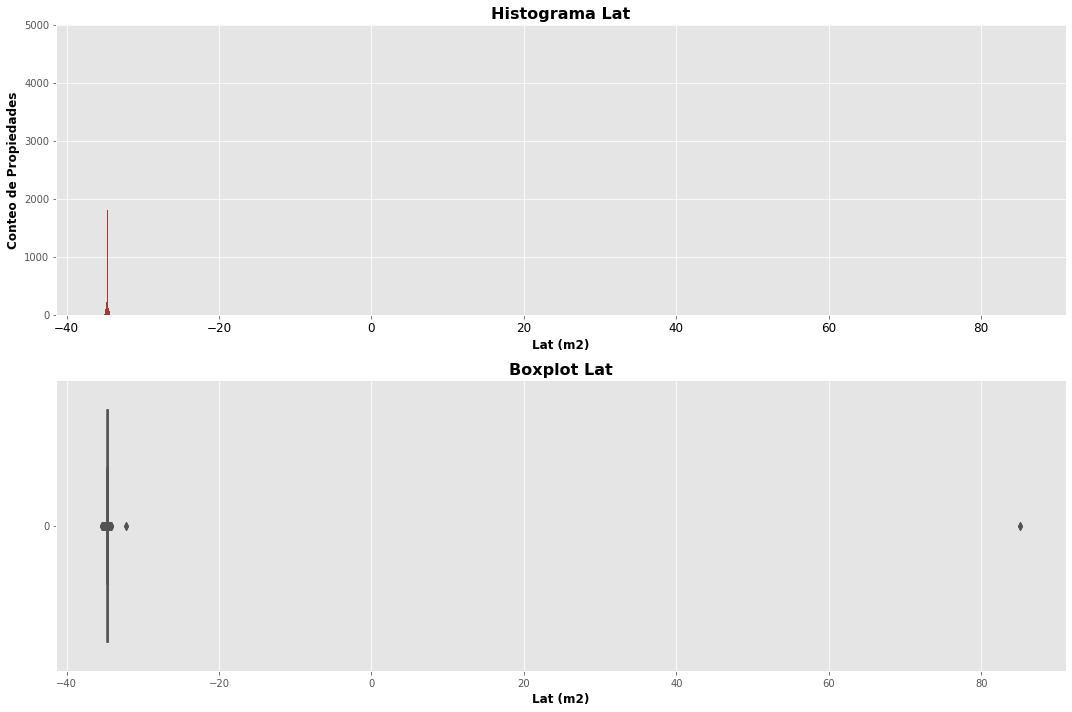

Evaluando: Lat
Outlier Z-Score Inf/Sup =  -36.01 / -33.20
Outlier IQR Inf/Sup =  -34.71 / -34.49
Outlier 10/90 Inf/Sup =  -34.71 / -34.50
count    136735.000000
mean        -34.604896
std           0.468428
min         -35.318457
25%         -34.627667
50%         -34.600943
75%         -34.574600
max          85.051129
Name: lat, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: Latitud
#Variable Numérica, Histograma
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'lat'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df[column_name], color='darkred')
plt.xlabel(column_name.capitalize() + ' (m2)', fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.xticks(fontsize=12, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
# ax1.set_xlim([0,400])
# ax1.set_ylim([0,600000])
ax1.set_title('Histograma ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize() + ' (m2)', fontweight ="bold", fontsize=12, color="black")
# ax2.set_xlim([0,400])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.2f}'.format(lowest_allowed), "/" , '{:.2f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.2f}'.format(lower_limit), "/" , '{:.2f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.2f}'.format(percentile10), "/" , '{:.2f}'.format(percentile90))

print(df[column_name].describe())

### *Longitud*

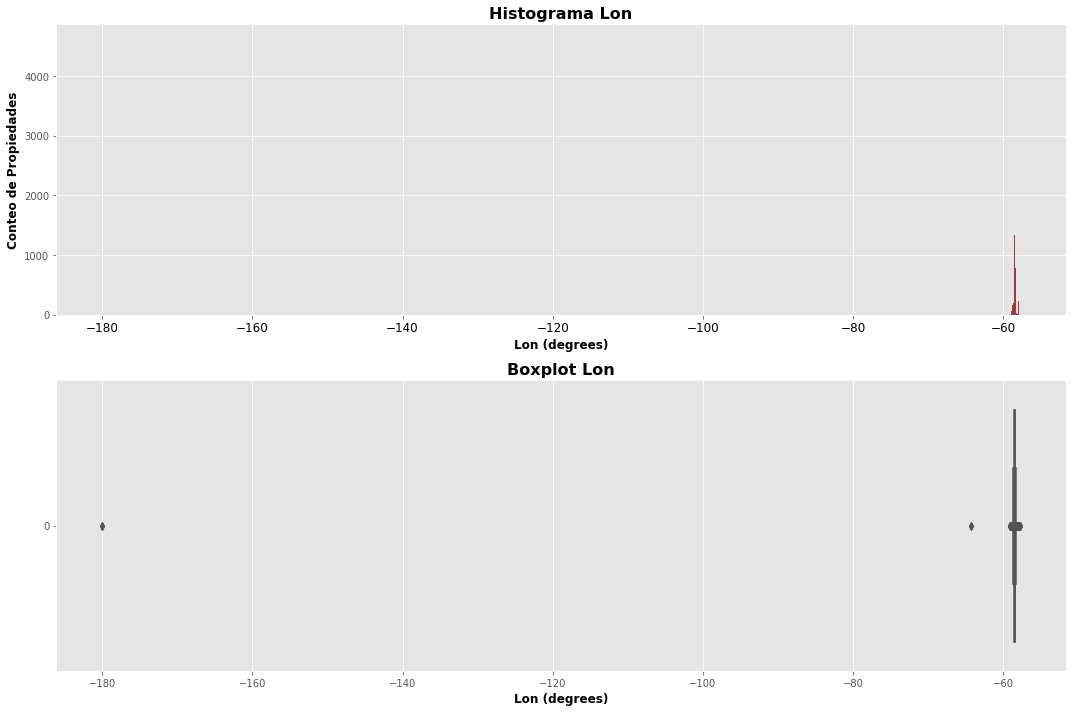

Evaluando: Lon
Outlier Z-Score Inf/Sup =  -59.92 / -57.01
Outlier IQR Inf/Sup =  -58.65 / -58.26
Outlier 10/90 Inf/Sup =  -58.63 / -58.38
count    136701.000000
mean        -58.465304
std           0.486190
min        -180.000000
25%         -58.504012
50%         -58.443262
75%         -58.407586
max         -57.805832
Name: lon, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: Longitud
#Variable Numérica, Histograma
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'lon'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Countplot
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df[column_name], color='darkred')
plt.xlabel(column_name.capitalize() + ' (degrees)', fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.xticks(fontsize=12, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
# ax1.set_xlim([0,400])
# ax1.set_ylim([0,600000])
ax1.set_title('Histograma ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize() + ' (degrees)', fontweight ="bold", fontsize=12, color="black")
# ax2.set_xlim([0,400])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.2f}'.format(lowest_allowed), "/" , '{:.2f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.2f}'.format(lower_limit), "/" , '{:.2f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.2f}'.format(percentile10), "/" , '{:.2f}'.format(percentile90))

print(df[column_name].describe())

### *Price*

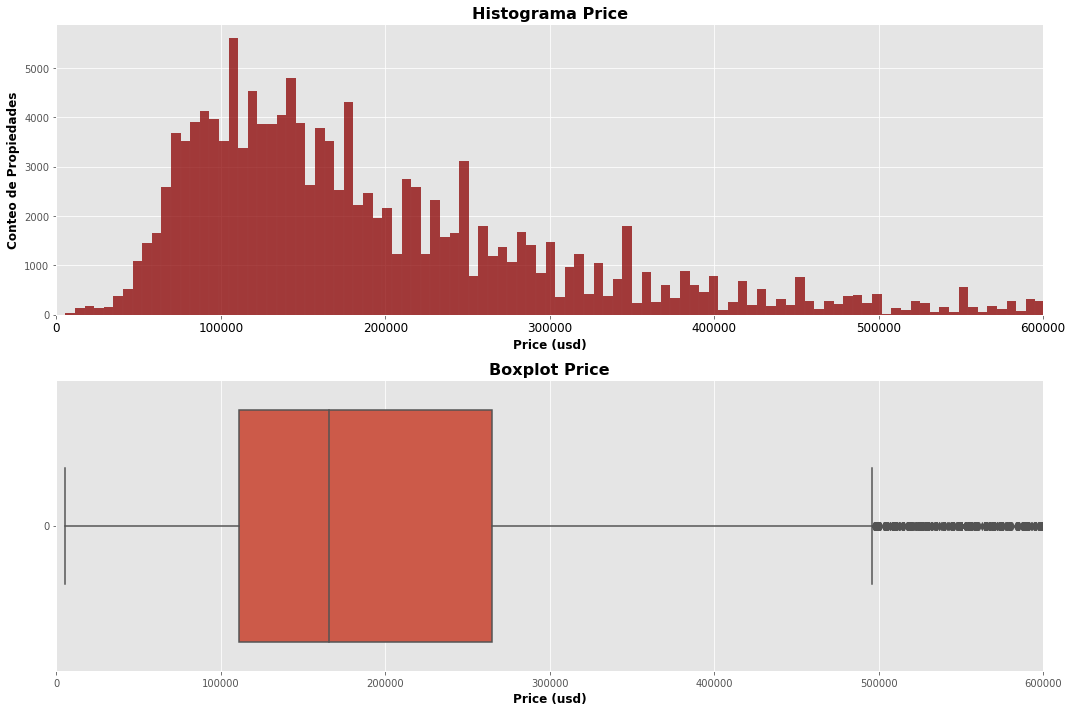

Evaluando: Price
Outlier Z-Score Inf/Sup =  -714337 / 1196779
Outlier IQR Inf/Sup =  -120000 / 496000
Outlier 10/90 Inf/Sup =  80000 / 430000
count    1.466600e+05
mean     2.412211e+05
std      3.185195e+05
min      5.500000e+03
25%      1.110000e+05
50%      1.660000e+05
75%      2.650000e+05
max      3.243423e+07
Name: price, dtype: float64


In [ ]:
#ESTUDIANDO LA DISTRIBUCIóN DE CADA VARIABLE: Price
#Variable Numérica, Histograma
from matplotlib.ticker import FormatStrFormatter

#Definimos un nombre genérico para el dataframe y la columna a evaluar
df = ar_properati_2
column_name = 'price'

#Definamos el tamaño del gráfico:
plt.figure(figsize=(15,10))

#Histograma
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df[column_name], color='darkred')
plt.xlabel(column_name.capitalize() + ' (usd)', fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.xticks(fontsize=12, color="black", rotation=0)
plt.ylabel('Conteo de Propiedades', fontweight ="bold", fontsize=12, color="black")
ax1.set_xlim([0,600000])
# ax1.set_ylim([0,600000])
ax1.set_title('Histograma ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")


#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df[column_name], orient='h')
plt.xlabel(column_name.capitalize() + ' (usd)', fontweight ="bold", fontsize=12, color="black")
ax2.set_xlim([0,600000])
# ax2.set_ylim([0,400])
ax2.set_title('Boxplot ' + column_name.capitalize(), fontweight ="bold", fontsize=16, color="black")
# ax2.title.set_text("Boxplot " + column_name.capitalize())


plt.tight_layout()
plt.show()

#OUTLIERS:
#Encontremos los valores frontera: Tratamiento Z-Score (se supone distribuciones +/- normales)
print("Evaluando: " + column_name.capitalize())
highest_allowed = df[column_name].mean() + 3*df[column_name].std()
lowest_allowed = df[column_name].mean() - 3*df[column_name].std() 
print("Outlier Z-Score Inf/Sup = ", '{:.0f}'.format(lowest_allowed), "/" , '{:.0f}'.format(highest_allowed))

#Encontremos los valores frontera: Tratamiento IQR (se supone distribuciones sesgadas)
#Encontrando IQR
percentile25 = df[column_name].quantile(0.25)
percentile75 = df[column_name].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Imprimiendo limites:
print("Outlier IQR Inf/Sup = ",'{:.0f}'.format(lower_limit), "/" , '{:.0f}'.format(upper_limit))

#Encontremos los valores frontera: Percentiles 10 / 90
percentile10 = df[column_name].quantile(0.1)
percentile90 = df[column_name].quantile(0.9)
print("Outlier 10/90 Inf/Sup = ",'{:.0f}'.format(percentile10), "/" , '{:.0f}'.format(percentile90))

print(df[column_name].describe())

PRECIO: Se puede observar que el precio promedio es de 175.000 usd, con dispersión a la derecha. El outlier por IQR (517500 usd) parece ser el más razonable considerando que por Z-Score es muy alto (1226297 usd) y representa menos del 10%, según lo muestra el percentil 90. Como mínimo se puede tomar el percentil 10 (90000 usd).

De acuerdo a lo anterior. Se definen los límites para los outliers:\
-rooms: 1 - 7\
-bedrooms: 1 - 6\
-bathrooms: 1 - 4\
-surface_total: 39 - 204\
-surface_covered: 36 - 174\
-price: 90 - 517000

---

<br />

# 2.-PREPROCESAMIENTO DE DATOS
<br />

---

## 2.0 Recordando el sprint 01

Recordemos el modelo de Arbol de Desición utilizado en sprint 01. Comparemos su rendimiento antes del preprocesamiento con el desempeño después del mismo.

A continuación, traemos el mismo dataset:

In [ ]:
#CREANDO DATAFRAME
print("Properati dataset previsto por Acámica: ", ar_properati.shape)

df1 = ar_properati

df_ML = df1.loc[
              ((df1['l2'] == 'Capital Federal') &
              ((df1['property_type'] == 'Departamento') | (df1['property_type'] == 'Casa') | (df1['property_type'] == 'PH')) &
              (df1['surface_total'] >= 15) & 
              (df1['surface_total'] <= 1000) &
              (df1['price'] <= 4000000)
              )
              ,['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].dropna()

print("Dataset filtado",df_ML.shape)

Properati dataset previsto por Acámica:  (146660, 19)
Dataset filtado (81019, 6)


Aplicamos la misma separación train/test:

In [ ]:
#Creando dataframe de variables predictoras:
X= df_ML.drop("price", axis=1)
# print(X)
print(X.shape)
# print(type(X))

#Creando dataframe de variable a predecir:
y = df_ML["price"]
# print(y)
print(y.shape)
# print(type(y))

#SEPARANDO SETS

#Definamos set de data de entrenamiento y prueba. Utilizando 30% para prueba.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1984)

(81019, 5)
(81019,)


Aplicamos y evaluamos un Arbol con profundidad máxima de 10:

Árbol de Decisión  - Depth=10
RMSE - DT Regresión - y_train: 122285 usd
RMSE - DT Regresión - y_test: 148058 usd
R2 Ajus DT: 80.93 %


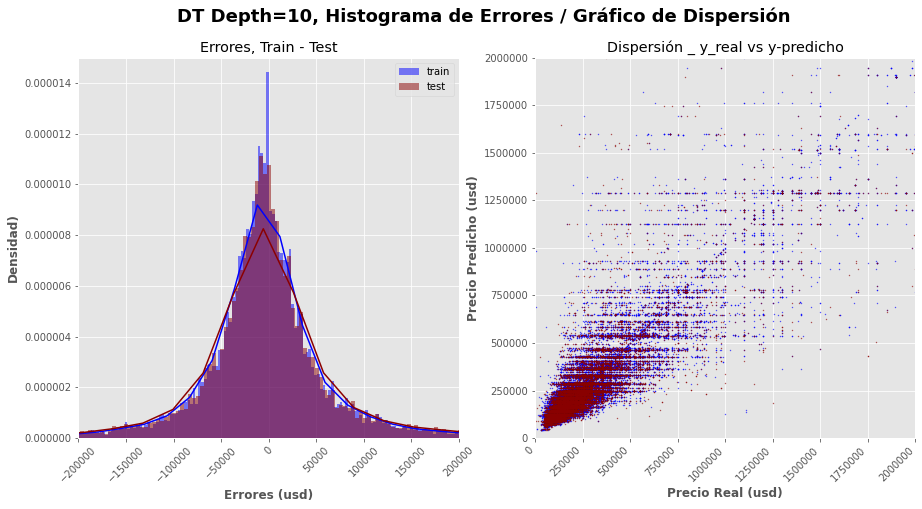

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Regresión - Árbol de Decisión (Para Profundidad = 10)
print("Árbol de Decisión  - Depth=10")

dt_reg = DecisionTreeRegressor(max_depth=10, random_state = 1984) #Creamos el objeto de árbol de decisiones a utilizar
dt_reg.fit(X_train,y_train) #Entrenamos el objeto regresor creado anteriormente

#Train
y_pred_train = dt_reg.predict(X_train) #Predecimos sobre train
rmse_train_depth10 = "{:.0f}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))) #Evaluamos train con RMSE
print("RMSE - DT Regresión - y_train:", rmse_train_depth10, 'usd') #Imprimimos el RMSE

#Test
y_pred_test = dt_reg.predict(X_test) #Predecimos sobre test
rmse_test_depth10 = "{:.0f}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))) #Evaluamos la predicción con RMSE
print("RMSE - DT Regresión - y_test:", rmse_test_depth10, 'usd') #Imprimimos el RMSE

#Calculando R2 y R2 ajustado sobre todo X
y_pred = dt_reg.predict(X)
SS_Residual = sum((y-y_pred)**2)       
SS_Total = sum((y-np.mean(y))**2)
r_squared_DT_depth10 = (1 - (float(SS_Residual))/SS_Total)
adjusted_r_squared_DT_depth10 = "{:.2f}".format((1 - (1-r_squared_DT_depth10)*(len(y)-1)/(len(y)-X.shape[1]-1))*100)
print('R2 Ajus DT:', adjusted_r_squared_DT_depth10, '%')


#Graficando errores y dispersión

plt.figure(figsize = (15,7))
plt.suptitle("DT Depth=10, Histograma de Errores / Gráfico de Dispersión", fontsize = 18, fontweight ="bold", color = "black")


plt.subplot(1,2,1)
sns.histplot(y_train - y_pred_train, label = 'train', kde=True, stat="density", linewidth=0, color='blue')
sns.histplot(y_test - y_pred_test, label = 'test', color="darkred", kde=True, stat="density", linewidth=0)
plt.title("Errores, Train - Test")
plt.xlabel("Errores (usd)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.xlim(-200000,200000)
plt.ylim(0,0.000015)
plt.ylabel("Densidad)", fontweight = "black", fontsize = 12)
plt.ticklabel_format(style='plain')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_train, y_pred_train, s=1, color="blue", alpha=0.5)
plt.scatter(y_test, y_pred_test, s=1, color="darkred", alpha=0.5)
plt.title("Dispersión _ y_real vs y-predicho")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Precio Real (usd)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio Predicho (usd)", fontweight = "black", fontsize = 12)
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.ticklabel_format(style='plain')
# plt.legend()

plt.show()

El mejor modelo del sprint 01 da RMSE entre 120.000 y 140.000 dólares con R2 de 80.93%, ahora apliquemos métodos de preprocesamiento.

Recopilemos la información en una tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT"], 
"Def/Opt":          ["Depth 10"], 
"MAE":              ["-"],
"RMSE":              ["120/140 k"], 
"R2 Ajus (%)":      [80.93],
"Comentarios":      ["Sprint 01"]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,Def/Opt,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,Depth 10,-,120/140 k,80.93,Sprint 01


## 2.0.0 Métodos de Preprocesamiento

De acuerdo a los requerimientos mínimos del proyecto se pide seleccionar entre las siguientes transformaciones:


*   Detección y eliminación de outliers
*   Encoding
*   Imputación de valores faltantes
*   Escalado de datos
*   Generación de nuevas variables predictoras (SVD)
*   Reducción de dimensionalidad (PCA)


La primera transformación a aplicar sería la **detección y eliminación de outliers**, ya que se pretende limpiar la data de estos valores de forma que no interfieran con los otras tranformaciones (alterando la distribución o media, por ejemplo).\
Después de eliminar los outliers se puede revisar si continuan los valores faltantes, de haberlos, se procedería como segunda transformación.\
Como tercera transformación se puede realizar escalado sobre las variables predictoras, para llevar todo a los mismos rangos de magnitudes.\
Luego se aplica aplicar One-Hot Encoding sobre las variables Zona y Tipo de Propiedad con la finalidad de considerar estas características en el modelado.

\



En base a esto se procederá a la evalución de los modelos. Luego de haber definido los mejores modelos (o el mejor) se aplciará **SVD** y **PCA** para evaluar que tanto mejora el modelo con estas otras transformaciones.

\

Entonces, comencemos...

## 2.1 Filtrado de Outliers

De acuerdo a los análisis de distribución de la sección anterior. Vamos a crear un nuevo dataframe filtrando los outliers. Los mínimos y máximos a usar como filtros serían:

*   rooms: 1 - 7
*   bedrooms: 1 - 6
*   bathrooms: 1 - 4
*   surface_total: 39 - 204
*   surface_covered: 36 - 174
*   longitud: -60, -56
*   latitud: -37, -32
*   price: 90 - 517000

\

Además selecionemos los mismos tipos de propiedades del sprint 01, que son los tres principales:

*   Departamentos
*   Casas
*   PHs


Un par de retoques antes de comenzar...

In [ ]:
#Eliminando las innecesarias:
df = ar_properati.drop(columns=['start_date', 'end_date','created_on','l1', 'title', 'description', 'currency', 'operation_type'])

#Cambiamos nombres:
df.rename({'l2': 'zona', 'l3': 'barrio'}, axis=1, inplace=True)

Filtrando los Outliers:

In [ ]:
#FILTRANDO POR OUTLIERS

#Creamos el dataframe fitrando por los criterios de los outliers
df = df
df2 = df.loc[                           
                        (df['rooms'].between(1,7)) & 
                        (df['bedrooms'].between(1,6)) & 
                        (df['bathrooms'].between(1,4)) & 
                        (df['surface_total'].between(39,204)) & 
                        (df['surface_covered'].between(36,174)) & 
                        (df['lat'].between(-37,-32)) & 
                        (df['lon'].between(-60,-56)) & 
                        ((df['property_type'] == 'Departamento') | (df['property_type'] == 'Casa') | (df['property_type'] == 'PH')) &
                        (df['price'].between(90000,517000)),['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','zona','price']]
print('Dataframe filtrando por outliers:', df2.shape)
df2.sample(3)

Dataframe filtrando por outliers: (73817, 10)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,zona,price
61656,-34.582814,-58.412240,4.0,3.0,2.0,100.0,100.0,Departamento,Capital Federal,265000.0
84731,-34.421933,-58.579470,3.0,2.0,2.0,67.0,60.0,Departamento,Bs.As. G.B.A. Zona Norte,220000.0
128391,-34.426414,-58.566269,2.0,1.0,1.0,52.0,46.0,Departamento,Bs.As. G.B.A. Zona Norte,160000.0


En este punto se tiene un dataframe reducido de 146.660 x 19 a 74093 x 10.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73817 entries, 1 to 146659
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              73817 non-null  float64
 1   lon              73817 non-null  float64
 2   rooms            73817 non-null  float64
 3   bedrooms         73817 non-null  float64
 4   bathrooms        73817 non-null  float64
 5   surface_total    73817 non-null  float64
 6   surface_covered  73817 non-null  float64
 7   property_type    73817 non-null  object 
 8   zona             73817 non-null  object 
 9   price            73817 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.2+ MB


LLama la atención que despues de eliminar los outliers no se tienen valores nulos, esto daría a pensar que tal vez esos valores nulos del dataset original tienen alguna relación con estas zonas de outliers. Se puede realizar un estudio de esto en otro momento.

Aprovechando que no hay outliers, revisemos rápidamente las correlaciones entre variables...

Creando cuadro de correlación...

In [ ]:
#OBTENIENDO MATRIZ DE CORRELACIÓN
correlacion = df2.corr().round(2)
correlacion

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.00,-0.76,-0.14,-0.11,0.10,-0.04,-0.06,0.16
lon,-0.76,1.00,0.09,0.07,-0.05,-0.04,0.02,0.03
rooms,-0.14,0.09,1.00,0.94,0.47,0.68,0.76,0.45
bedrooms,-0.11,0.07,0.94,1.00,0.48,0.66,0.75,0.45
bathrooms,0.10,-0.05,0.47,0.48,1.00,0.51,0.57,0.57
surface_total,-0.04,-0.04,0.68,0.66,0.51,1.00,0.87,0.56
surface_covered,-0.06,0.02,0.76,0.75,0.57,0.87,1.00,0.63
price,0.16,0.03,0.45,0.45,0.57,0.56,0.63,1.00


Graficando matriz de correlación..

Text(0.5, 1.0, 'Matriz de Correlación')

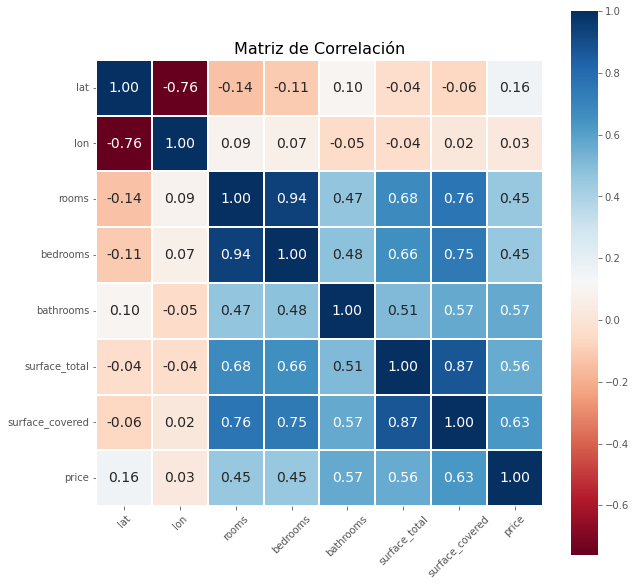

In [ ]:
#GRAFICANDO MATRIZ DE CORRELACIÓN
plt.figure(figsize = (10,10))
sns.heatmap(correlacion, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 14}, cmap= 'RdBu', linewidths=1)
plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.title("Matriz de Correlación", fontsize = 16, color = "black")

*En Resumen:*\
-La correlación más alta es entre rooms y bedrooms, con un 94%.\
-La variable que mejor se relaciona con el precio es covered_surface, mostrando un 63%.\
-Las variables que peor se relacionan con el precio son, bedrooms y rooms con 45%. (excluyendo longitud y latitud que por ser distribuciones geográficas, separadas no hablan mucho de una distribución).\
-Como es de esperarse, total_surface y covered_surface guardan una fuerte correlación de 87%, ambas presentan la mejor correlación con el precio.

##2.2 Datos: Faltantes

Después de la eliminación de outliers se observa que no hay valores nulos. Por lo que este preprocesamiento no sería necesario. Sin embargo como muestra para el tech-reviwer se aplica imputación en el dataset original.\
NOTA: esta parte no será utiizada en el resto del proyecto.

In [ ]:
#IDENTIFICANDO VALORES FALTANTES:

#Realizamos sumatoria de todas las instancias nulas en cada columna, además se almacenan solo aquellas que tienen nulos, de esto resulta una serie:
ar_properati_nulos = ar_properati.isnull().sum().sort_values(ascending =False)[ar_properati.isnull().sum()>0]
# print(type(ar_properati_nulos)) #codigo de chequeo

#Convertimos la serie en dataframe
ar_properati_nulos_df = pd.DataFrame({'Nombre_de_columna_con_Nulos':ar_properati_nulos.index,'Cant_de_Nulos':ar_properati_nulos.values})

#Almacenamos la cantidad de filas totales del dataframe:
filas = ar_properati.shape[0]
print("La cantidad de instancias (filas) totales es de %i."%(filas))

# print("Cantidad de nulos por columnas y el porcentaje que re presentan:")
ar_properati_nulos_df['% de Nulos'] = round(((ar_properati_nulos_df.Cant_de_Nulos/filas)*100),2)
ar_properati_nulos_df

La cantidad de instancias (filas) totales es de 146660.


,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos
0,surface_covered,21614,14.74
1,surface_total,20527,14.00
2,lon,9959,6.79
3,lat,9925,6.77
4,bathrooms,5957,4.06


Cinco features tienen valores faltantes. Vamos a tratarlos...

###*Superficies*

Primero vamos a reemplazar los valores faltantes de superficie total por el valor de superficie cubierta y viceversa.De esta forma, aquellas instancias que tengan al menos una de estas carasterísticas servirá para llenar la otra.

In [ ]:
ar_properati_2 = ar_properati
ar_properati_2.surface_covered.fillna(ar_properati_2.surface_total, inplace=True)
ar_properati_2.surface_total.fillna(ar_properati_2.surface_covered, inplace=True)

ar_properati_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126648 non-null  float64
 12  surface_covered  126648 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Ahora los nulos en las superficies son en aquellas instancias en donde faltan en ambas features (total y cubierta).\
Vamos a llenarlo estos nulos...

\
Para rellenar estos valores se pueden usar varios métodos. Vamos a evaluar rellenarlos por promedio y por mediana, esto considerando el tipo de propiedad. Obtengamos a continuación ambas estadísticas y estudiemos cuál sería la mas idónea.

Obtengamos la mediana de superficie total por tipo de propiedad...

In [ ]:
median_surface = ar_properati_2[['surface_total', 'property_type']].groupby('property_type').agg(pd.Series.median)
median_surface.to_dict()

{'surface_total': {'Casa': 300.0,
  'Casa de campo': 2462.0,
  'Cochera': 13.5,
  'Departamento': 67.0,
  'Depósito': 480.0,
  'Local comercial': 106.5,
  'Lote': 520.0,
  'Oficina': 65.0,
  'Otro': 678.0,
  'PH': 105.0}}

Obtengamos la media de superficie total por tipo de propiedad...

In [ ]:
mean_surface = ar_properati_2[['surface_total', 'property_type']].groupby('property_type').agg(pd.Series.mean)
mean_surface.to_dict()

{'surface_total': {'Casa': 656.0287112755924,
  'Casa de campo': 4018.5813953488373,
  'Cochera': 13.5,
  'Departamento': 99.02584712874656,
  'Depósito': 624.375,
  'Local comercial': 258.5833333333333,
  'Lote': 2481.002836879433,
  'Oficina': 82.37626262626263,
  'Otro': 8141.928251121076,
  'PH': 172.52523548432447}}

Si observamos las propiedades más comunes que son casas y departamentos, podemos ver que los valores de media son mayores que los de mediana. Esto porque la media esta afectado por la magninutd de los outliers, que todavía no han sido tratados. Sin embargo, la mediana se ve afectada es por la cantidad de outliers y no por su magnitud, considerando que los outliers son atípicos y son un bajo porcentaje se decide rellenar con la mediana, que tiene menos distorsión.
\
\
\
Rellenamos superficie total con mediana por tipo de propiedad.

In [ ]:
ar_properati_2 = ar_properati_2.set_index('property_type')
ar_properati_2.surface_total.fillna(median_surface.to_dict()['surface_total'], inplace=True)
ar_properati_2.reset_index(inplace=True)
ar_properati_2.sample(3)

,property_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type
138187,Departamento,2019-07-31,2019-12-20,2019-07-31,-34.558510,-58.462697,Argentina,Capital Federal,Belgrano,2.0,1.0,1.0,58.0,58.0,185000.0,USD,Hermoso departamento muy cuidado,"Exelente departamento,muy luminoso muy ventil...",Venta
103002,PH,2019-02-15,2019-04-21,2019-02-15,-34.735098,-58.434155,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,3.0,2.0,1.0,117.0,117.0,55000.0,USD,PH INTERNO ÁPTO CRÉDITO !!!!!!!,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Venta
107760,Departamento,2019-04-09,2019-06-23,2019-04-09,-34.571763,-58.440359,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,84.0,75.0,285000.0,USD,Venta. Departamento 3 ambientes. 84 m². Cocher...,CARACTERÍSTICAS - Ambientes: 3.- Superficie to...,Venta


In [ ]:
ar_properati_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   property_type    146660 non-null  object 
 1   start_date       146660 non-null  object 
 2   end_date         146660 non-null  object 
 3   created_on       146660 non-null  object 
 4   lat              136735 non-null  float64
 5   lon              136701 non-null  float64
 6   l1               146660 non-null  object 
 7   l2               146660 non-null  object 
 8   l3               146660 non-null  object 
 9   rooms            146660 non-null  float64
 10  bedrooms         146660 non-null  float64
 11  bathrooms        140703 non-null  float64
 12  surface_total    146660 non-null  float64
 13  surface_covered  126648 non-null  float64
 14  price            146660 non-null  float64
 15  currency         146660 non-null  object 
 16  title            146660 non-null  obje

Rellenamos superficie cubierta con mediana por tipo de propiedad.

In [ ]:
ar_properati_2.surface_covered.fillna(ar_properati_2.surface_total, inplace=True)

In [ ]:
ar_properati_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   property_type    146660 non-null  object 
 1   start_date       146660 non-null  object 
 2   end_date         146660 non-null  object 
 3   created_on       146660 non-null  object 
 4   lat              136735 non-null  float64
 5   lon              136701 non-null  float64
 6   l1               146660 non-null  object 
 7   l2               146660 non-null  object 
 8   l3               146660 non-null  object 
 9   rooms            146660 non-null  float64
 10  bedrooms         146660 non-null  float64
 11  bathrooms        140703 non-null  float64
 12  surface_total    146660 non-null  float64
 13  surface_covered  146660 non-null  float64
 14  price            146660 non-null  float64
 15  currency         146660 non-null  object 
 16  title            146660 non-null  obje

Como observamos ya la cantidad de valores no-nulos en las propiedades es el total de instancias posibles.

###*Latitud y Longitud*

Utilicemos la media por barrio para rellenar los nulos, este se considera el mejor método ya que la ubicación esta directamente relacionada al barrio.

In [ ]:
lon_barrio = ar_properati_2[['lon','l3']].groupby('l3').agg(pd.Series.mean)
lat_barrio = ar_properati_2[['lat','l3']].groupby('l3').agg(pd.Series.mean)
ar_properati_2 = ar_properati_2.set_index('l3')
ar_properati_2.lon.fillna(lon_barrio.to_dict()['lon'], inplace=True)
ar_properati_2.lat.fillna(lat_barrio.to_dict()['lat'], inplace=True)
ar_properati_2 = ar_properati_2.reset_index()
# ar_properati_2.sample(2)

In [ ]:
ar_properati_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   l3               146660 non-null  object 
 1   property_type    146660 non-null  object 
 2   start_date       146660 non-null  object 
 3   end_date         146660 non-null  object 
 4   created_on       146660 non-null  object 
 5   lat              146660 non-null  float64
 6   lon              146660 non-null  float64
 7   l1               146660 non-null  object 
 8   l2               146660 non-null  object 
 9   rooms            146660 non-null  float64
 10  bedrooms         146660 non-null  float64
 11  bathrooms        140703 non-null  float64
 12  surface_total    146660 non-null  float64
 13  surface_covered  146660 non-null  float64
 14  price            146660 non-null  float64
 15  currency         146660 non-null  object 
 16  title            146660 non-null  obje

Ya hemos rellenado los valores de longitud y latitud.

###*Baños*

Rellenemos baños con la moda debido a que se quiere un valor entrero que mas se repita, para ello, usaremos la cantidad de habitaciones como característca de amanarre:

Creamos libreria de modas

In [ ]:
# Obtengamos la moda de bathrooms por bedroomns...

mode_batrooms = ar_properati_2[['bathrooms', 'bedrooms']].groupby('bedrooms').agg(pd.Series.mode)
mode_batrooms.to_dict()

{'bathrooms': {0.0: 1.0,
  1.0: 1.0,
  2.0: 1.0,
  3.0: 2.0,
  4.0: 2.0,
  5.0: 3.0,
  6.0: 2.0,
  7.0: 1.0,
  8.0: 4.0,
  9.0: 4.0,
  10.0: 2.0,
  11.0: array([1., 7.]),
  12.0: 7.0,
  13.0: 13.0,
  14.0: 6.0,
  15.0: 4.0}}

Se notan valores un poco ilógios para bedrooms de 10, 14 y 15, ya que se espera que la cantidad de bathrooms aumente y por el contrario lo que hace es disminuir. Esto podría ser un punto de estudio interesante.

Rellenamos con los valores del diccionario:

In [ ]:
ar_properati_bedrooms = ar_properati_2.set_index('bedrooms')

In [ ]:
ar_properati_bedrooms.bathrooms.fillna(mode_batrooms.to_dict()['bathrooms'], inplace=True)

In [ ]:
ar_properati_bedrooms.sample(3)

,l3,property_type,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type
bedrooms,,,,,,,,,,,,,,,,,,
1.0,Tigre,Departamento,2019-06-29,2019-06-30,2019-06-29,-34.415781,-58.624472,Argentina,Bs.As. G.B.A. Zona Norte,2.0,1.0,72.0,72.0,140000.0,USD,"DEPARTAMENTO EN VENTA, TIGRE, NORDELTA, 2 AMB...","DEPARTAMENTO EN VENTA, TIGRE, NORDELTA, 2 AMB...",Venta
2.0,Palermo,Departamento,2019-01-06,2019-03-24,2019-01-06,-34.590903,-58.408108,Argentina,Capital Federal,3.0,3.0,132.0,125.0,357000.0,USD,Venta Departamento 3 ambientes Zona Alto Palermo,Corredor Responsable: MARIANO AUFSEHER - CUCIC...,Venta
2.0,Morón,Departamento,2020-01-24,2020-02-13,2020-01-24,-34.646791,-58.598131,Argentina,Bs.As. G.B.A. Zona Oeste,3.0,1.0,60.0,60.0,73000.0,USD,Se vende hermoso departamento 3 ambientes zona...,Se vende hermoso departamento esta unidad cuen...,Venta


Devolvemos el índex original...

In [ ]:
ar_properati_bedrooms.reset_index(inplace=True)
ar_properati_bedrooms.sample(3)

,bedrooms,l3,property_type,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type
140798,4.0,Villa Crespo,Departamento,2019-07-31,2019-08-14,2019-07-31,-34.596846,-58.447715,Argentina,Capital Federal,5.0,2.0,115.0,110.0,320000.0,USD,4 ambientes con vista panorámica a la ciudad!!!,Inmueble que posee ambientes con medidas gener...,Venta
58003,0.0,San Miguel,Departamento,2019-11-13,9999-12-31,2019-11-13,-34.539519,-58.717277,Argentina,Bs.As. G.B.A. Zona Norte,1.0,1.0,67.0,67.0,64000.0,USD,"Departamento en Venta en Brick, San miguel U$S...","Venta de Departamento MONOAMBIENTE en Brick, S...",Venta
109131,1.0,Pilar,Departamento,2019-10-18,2019-11-15,2019-10-18,-34.420180,-58.842264,Argentina,Bs.As. G.B.A. Zona Norte,2.0,1.0,81.0,42.0,120000.0,USD,"Departamento 2 ambientes en Green Village, Pilar","Departamento 2 ambientes en Green Village, Pil...",Venta


In [ ]:
ar_properati_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bedrooms         146660 non-null  float64
 1   l3               146660 non-null  object 
 2   property_type    146660 non-null  object 
 3   start_date       146660 non-null  object 
 4   end_date         146660 non-null  object 
 5   created_on       146660 non-null  object 
 6   lat              146660 non-null  float64
 7   lon              146660 non-null  float64
 8   l1               146660 non-null  object 
 9   l2               146660 non-null  object 
 10  rooms            146660 non-null  float64
 11  bathrooms        146660 non-null  float64
 12  surface_total    146660 non-null  float64
 13  surface_covered  146660 non-null  float64
 14  price            146660 non-null  float64
 15  currency         146660 non-null  object 
 16  title            146660 non-null  obje

De esta forma se tienen todos los nulos correjidos por diferentes métodos. Pero como dijimos al principio de este bloque, seguiremos trabajando con e dataset reducido por outliers el cual no presentaba valores nulos.

##2.3 Escalado de datos

Sigamos trabajando con el dataset filtrado por outliers.

In [ ]:
df2.sample(3)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,zona,price
26185,-34.515157,-58.491440,3.0,2.0,1.0,67.0,62.0,Departamento,Bs.As. G.B.A. Zona Norte,255000.0
46969,-34.563256,-58.462365,2.0,1.0,1.0,50.0,46.0,Departamento,Capital Federal,240000.0
144503,-34.389967,-58.643630,3.0,2.0,3.0,103.0,103.0,Departamento,Bs.As. G.B.A. Zona Norte,290000.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73817 entries, 1 to 146659
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              73817 non-null  float64
 1   lon              73817 non-null  float64
 2   rooms            73817 non-null  float64
 3   bedrooms         73817 non-null  float64
 4   bathrooms        73817 non-null  float64
 5   surface_total    73817 non-null  float64
 6   surface_covered  73817 non-null  float64
 7   property_type    73817 non-null  object 
 8   zona             73817 non-null  object 
 9   price            73817 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.2+ MB


Apliquemos escalado sobre las variables numéricas...

In [ ]:
from sklearn.preprocessing import StandardScaler

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(10)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,zona,price
95026,-0.258062,0.183518,-1.026399,-1.137060,-0.704169,-0.800323,-1.164325,Departamento,Capital Federal,95000.0
12102,-0.194062,0.194157,0.042485,0.067734,0.867353,0.074174,0.155607,Departamento,Capital Federal,173000.0
50574,-0.014517,0.468489,-1.026399,-1.137060,-0.704169,-1.018947,-1.129590,Departamento,Capital Federal,210000.0
57099,-0.925109,-0.410706,0.042485,0.067734,-0.704169,2.588353,0.746103,PH,Capital Federal,160000.0
129941,-0.213220,0.022478,-2.095282,-1.137060,-0.704169,-1.073603,-1.025385,Departamento,Capital Federal,110000.0
29638,-2.044357,1.583643,2.180252,1.272527,0.867353,1.303935,0.433487,Departamento,Bs.As. G.B.A. Zona Sur,105000.0
79502,0.115045,0.322801,1.111368,1.272527,0.867353,-0.253762,0.086137,Departamento,Capital Federal,235000.0
119277,0.281010,0.076849,-2.095282,-1.137060,0.867353,-0.909635,-0.990650,Departamento,Capital Federal,175000.0
14039,0.060594,0.317715,0.042485,0.067734,0.867353,0.402110,0.607162,Departamento,Capital Federal,280000.0
141042,0.056069,0.401371,1.111368,1.272527,2.438875,1.331263,1.718684,Departamento,Capital Federal,398000.0


Ya tenemos todas las variables numéricas escalados, de esta forma se evitará que aquellos modelos suceptibles a las magnitudes sean sesgados. Ahora vamos con hot-encoding...

##2.4 One Hot Encoding

Apliquemos one-hot-encoding al feature 'zona'. De esta forma diferenciaremos por zona y esto puede ayudar a los modelos con las predcciones.

In [ ]:
#Apliquemos one-hot-encoding con get dummies:
df3 = pd.get_dummies(df2, columns = ['zona'])

In [ ]:
#Revisemos el dataset:
df3.sample(5)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,price,zona_Bs.As. G.B.A. Zona Norte,zona_Bs.As. G.B.A. Zona Oeste,zona_Bs.As. G.B.A. Zona Sur,zona_Capital Federal
49477,0.115523,0.429848,0.042485,0.067734,-0.704169,-0.062466,0.329282,Departamento,350000.0,0,0,0,1
97447,-0.006887,0.677492,1.111368,0.067734,0.867353,0.538751,0.989248,Departamento,380000.0,0,0,0,1
140680,-0.203636,0.762427,1.111368,1.272527,-0.704169,0.839359,1.128188,Departamento,160000.0,0,0,0,1
3571,0.425468,0.014759,1.111368,1.272527,0.867353,2.888961,2.621795,PH,399000.0,0,0,0,1
83733,-0.127306,0.117057,1.111368,1.272527,0.867353,0.593407,0.815573,Departamento,348000.0,0,0,0,1


In [ ]:
df3 = df3.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

In [ ]:
column_to_move = df3.pop("price")
df3.insert(12, "price", column_to_move)
df3.sample(3)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,Zona Norte,Zona Oeste,Zona Sur,Zona Federal,price
51931,-0.202698,0.208190,0.042485,0.067734,0.867353,-0.663683,-0.608564,Departamento,0,0,0,1,173000.0
140807,0.008537,0.654440,1.111368,0.067734,2.438875,0.812031,1.336598,Departamento,0,0,0,1,440000.0
7690,2.175952,-3.771922,-1.026399,-1.137060,-0.704169,-0.936963,-0.782239,Departamento,1,0,0,0,94500.0


Apliquemos One-Hot-Encoding al tipo de propiedad

In [ ]:
#Apliquemos one-hot-encoding con get dummies:
df3 = pd.get_dummies(df3, columns = ['property_type'])
#Revisemos el dataset:
df3.sample(5)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Zona Norte,Zona Oeste,Zona Sur,Zona Federal,price,property_type_Casa,property_type_Departamento,property_type_PH
72680,-0.327321,0.155249,1.111368,1.272527,4.010397,2.069120,2.621795,0,0,0,1,420000.0,0,1,0
87524,-4.361717,4.933827,0.042485,-1.137060,0.867353,0.484094,0.225077,0,0,1,0,93000.0,1,0,0
35450,-0.431110,0.775493,-2.095282,-1.137060,-0.704169,-0.772995,-1.199060,0,0,0,1,130000.0,0,1,0
75189,-0.499824,0.295389,0.042485,0.067734,-0.704169,-0.772995,-0.434889,0,0,0,1,180000.0,0,1,0
140483,0.293004,-0.061453,1.111368,1.272527,0.867353,0.429438,0.954513,0,0,0,1,310000.0,0,1,0


In [ ]:
df3 = df3.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

NameError: ignored

In [ ]:
column_to_move = df3.pop("price")
df3.insert(14, "price", column_to_move)
df3.sample(3)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Zona Norte,Zona Oeste,Zona Sur,Zona Federal,property_type_Casa,property_type_Departamento,property_type_PH,price
91254,1.325585,-1.190245,1.111368,1.272527,0.867353,1.905152,1.892359,1,0,0,0,0,1,0,490000.0
129019,-0.776475,0.322014,0.042485,0.067734,0.867353,0.538751,1.093453,0,0,0,1,0,1,0,140000.0
119654,-0.183102,0.217544,0.042485,0.067734,-0.704169,-0.335746,-0.087539,0,0,0,1,0,1,0,180000.0


Ya hemos realizo el preprocesamento, ahora probemos como daría el mejor modelo del sprint 01 con todo este arreglo...

##2.5 Aplicando modelo sprint 01

In [ ]:
#Creando dataframe de variables predictoras:
df_ML = df3

X= df_ML.drop("price", axis=1)
# print(X)
print(X.shape)
# print(type(X))

#Creando dataframe de variable a predecir:
y = df_ML["price"]
# print(y)
print(y.shape)
# print(type(y))

#SEPARANDO SETS

#Definamos set de data de entrenamiento y prueba. Utilizando 30% para prueba.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1984)

(73817, 14)
(73817,)


Árbol de Decisión  - Depth=10
RMSE - DT Regresión - y_train: 39550 usd
RMSE - DT Regresión - y_test: 42966 usd
R2 Ajus DT: 79.10 %


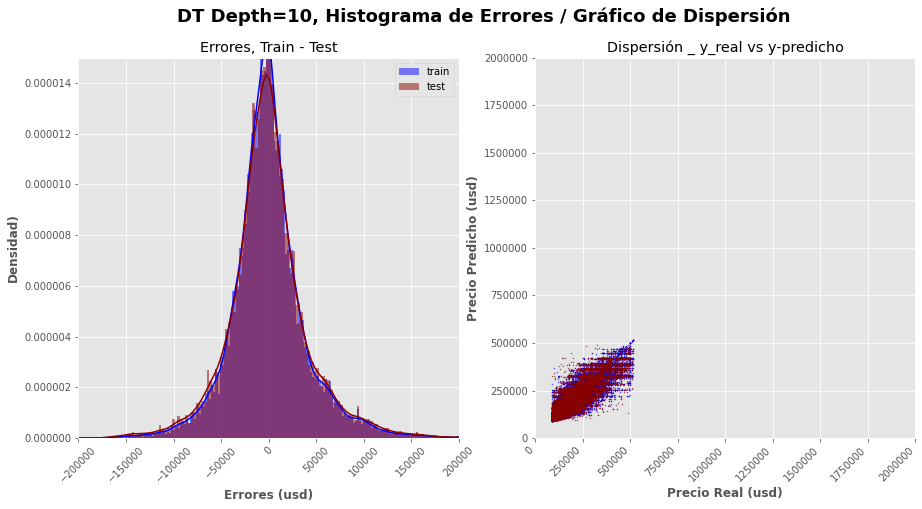

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Regresión - Árbol de Decisión (Para Profundidad = 10)
print("Árbol de Decisión  - Depth=10")

dt_reg = DecisionTreeRegressor(max_depth=10, random_state = 1984) #Creamos el objeto de árbol de decisiones a utilizar
dt_reg.fit(X_train,y_train) #Entrenamos el objeto regresor creado anteriormente

#Train
y_pred_train = dt_reg.predict(X_train) #Predecimos sobre train
rmse_train_depth10 = "{:.0f}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))) #Evaluamos train con RMSE
print("RMSE - DT Regresión - y_train:", rmse_train_depth10, 'usd') #Imprimimos el RMSE

#Test
y_pred_test = dt_reg.predict(X_test) #Predecimos sobre test
rmse_test_depth10 = "{:.0f}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))) #Evaluamos la predicción con RMSE
print("RMSE - DT Regresión - y_test:", rmse_test_depth10, 'usd') #Imprimimos el RMSE

#Calculando R2 y R2 ajustado sobre todo X
y_pred = dt_reg.predict(X)
SS_Residual = sum((y-y_pred)**2)       
SS_Total = sum((y-np.mean(y))**2)
r_squared_DT_depth10 = (1 - (float(SS_Residual))/SS_Total)
adjusted_r_squared_DT_depth10 = "{:.2f}".format((1 - (1-r_squared_DT_depth10)*(len(y)-1)/(len(y)-X.shape[1]-1))*100)
print('R2 Ajus DT:', adjusted_r_squared_DT_depth10, '%')


#Graficando errores y dispersión

plt.figure(figsize = (15,7))
plt.suptitle("DT Depth=10, Histograma de Errores / Gráfico de Dispersión", fontsize = 18, fontweight ="bold", color = "black")


plt.subplot(1,2,1)
sns.histplot(y_train - y_pred_train, label = 'train', kde=True, stat="density", linewidth=0, color='blue')
sns.histplot(y_test - y_pred_test, label = 'test', color="darkred", kde=True, stat="density", linewidth=0)
plt.title("Errores, Train - Test")
plt.xlabel("Errores (usd)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.xlim(-200000,200000)
plt.ylim(0,0.000015)
plt.ylabel("Densidad)", fontweight = "black", fontsize = 12)
plt.ticklabel_format(style='plain')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_train, y_pred_train, s=1, color="blue", alpha=0.5)
plt.scatter(y_test, y_pred_test, s=1, color="darkred", alpha=0.5)
plt.title("Dispersión _ y_real vs y-predicho")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Precio Real (usd)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio Predicho (usd)", fontweight = "black", fontsize = 12)
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.ticklabel_format(style='plain')
# plt.legend()

plt.show()

# Resultado:
# Árbol de Decisión  - Depth=10
# RMSE - DT Regresión - y_train: 39550 usd
# RMSE - DT Regresión - y_test: 42966 usd
# R2 Ajus DT: 79.10 %

Se tiene una mejora considerable, rmse de 130 a 40 k, sólo con las transformaciones, usando el mismo árbol de profundidad 10. Esto demuestra lo mucho que ayuda el preprocesamiento en la optimización de los modelos.

Actualicemos la tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT"], 
"Def/Opt":          ["Depth 10","Depth 10"], 
"MAE":              ["-","-"],
"RMSE":              ["120/140 k","39/42 k"], 
"R2 Ajus (%)":      [80.93,79.10],
"Comentarios":      ["Sprint 01","Sprint 01 con Transf"]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,Def/Opt,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,Depth 10,-,120/140 k,80.93,Sprint 01
1,DT,Depth 10,-,39/42 k,79.10,Sprint 01 con Transf


---

<br />

# 3.-MODELOS AVANZADOS
<br />

---

##3.0.-Ordenando Ideas

Vamos a ordenar un poco las ideas...




Importemos librerías para modelos avanzados:

In [ ]:
#Métricas:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Separación de datasets:
from sklearn.model_selection import train_test_split

#Modelos Avanzados:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

#Validación cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#Optimización de hiperparámetros:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Dataset a utilizar**: sigamos usando el dataset que tiene los outliers filtrados y el preprocesamiento explicado anteriormente, lo recordamos:

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73817 entries, 1 to 146659
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              73817 non-null  float64
 1   lon              73817 non-null  float64
 2   rooms            73817 non-null  float64
 3   bedrooms         73817 non-null  float64
 4   bathrooms        73817 non-null  float64
 5   surface_total    73817 non-null  float64
 6   surface_covered  73817 non-null  float64
 7   Zona Norte       73817 non-null  uint8  
 8   Zona Oeste       73817 non-null  uint8  
 9   Zona Sur         73817 non-null  uint8  
 10  Zona Federal     73817 non-null  uint8  
 11  Casa             73817 non-null  uint8  
 12  Departamento     73817 non-null  uint8  
 13  PH               73817 non-null  uint8  
 14  price            73817 non-null  float64
dtypes: float64(8), uint8(7)
memory usage: 5.6 MB


**Separando variables** a utilizar...

In [ ]:
#Creando dataframe de variables predictoras:
X= df3.drop("price", axis=1).values
#Creando dataframe de variable a predecir:
y = df3["price"]

#-----------------------------------------------------------------------------
#Chequeando:
print('X: ' , X.shape)
print('y: ' , y.shape)

X:  (73817, 14)
y:  (73817,)


**Separando Hold-Out** que será utilizado para revisar comportamiento de los modelos. Trabajemos con un 10%...

In [ ]:
#Separando 10% de hold-out:
X_modelo, X_hold_out, y_modelo, y_hold_out = train_test_split(X, y, test_size=0.1, random_state=1984)
print('X modelo: ' , X_modelo.shape)
print('y modelo: ' , y_modelo.shape)
print('X hold-out: ' , X_hold_out.shape)
print('y hold-out: ' , y_hold_out.shape)

X modelo:  (66435, 14)
y modelo:  (66435,)
X hold-out:  (7382, 14)
y hold-out:  (7382,)


**Definiendo Métricas**:\
El principal objetivo es reducir el RMSE con la utlización de los modelos avanzados, así que ésta métrica y MAE serán considerados, además como complemento y por razones de ir conociendo más acerca de como varían las métricas, se tendrá tambien a R2 ajustado como otra referencia. Pero recordando que el principal objetivo es reducir el RMSE.

##3.1-Reg Lineal Avanzada

####*3.1.1-Sin Regularizar*

Creamos un modelo de Regresión Linela Avanzada, sin regularazión. Con polinomio  grado 2.

In [ ]:
#Importamos librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=2
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Obtenemos nuevos features polinómicos sobre todo X_train:
X_train_new = poly.fit_transform(X_train) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#creamos una regresion lineal:
model = LinearRegression()

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train_new, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('Regresión Lineal Avanzada, grado 2:')
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
rl_mae_1 = ("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd')
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')
rl_r2_1 = ("{:.2f}".format(scores['test_r2'].mean()*100))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Solo con Apartamentos:
# Regresión Lineal Avanzada grado 2:
# X_train:  (55286, 11)
# X_train_new:  (55286, 77)
# MAE: 37169 usd
# RMSE: 50595 usd
# R2: 68.90 %
# Duration:  0:00:01.496250

# **** Agregando tipos de propiedad:
# Regresión Lineal Avanzada, grado 2:
# X_train:  (66435, 14)
# X_train_new:  (66435, 119)
# MAE: 36994 usd
# RMSE: 50233 usd
# R2: 68.02 %
# Duration:  0:00:04.058765

Regresión Lineal Avanzada, grado 2:
X_train:  (66435, 14)
X_train_new:  (66435, 119)
MAE: 36994 usd
RMSE: 50233 usd
R2: 68.02 %
Duration:  0:00:04.058765


Recopilemos la información en una tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Lin Avan"], 
"Def/Opt":          ["Depth 10","Depth 10","Grado 2"], 
"MAE":              ["-","-",36994],
"RMSE":              ["120/140 k","39/42 k",50233], 
"R2 Ajus (%)":      [80.93,79.10,68.02],

"Comentarios":[
"Sprint 01"
,"Sprint 01 con Transf"
,"Sin Reg"
]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,Def/Opt,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,Depth 10,-,120/140 k,80.93,Sprint 01
1,DT,Depth 10,-,39/42 k,79.10,Sprint 01 con Transf
2,Lin Avan,Grado 2,36994,50233,68.02,Sin Reg


Ahora corramos un modelo con grado 4 a ver que tanto mejora..

In [ ]:
#Importamos librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Obtenemos nuevos features polinómicos sobre todo X_train:
X_train_new = poly.fit_transform(X_train) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#creamos una regresion lineal:
model = LinearRegression()

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train_new, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('Regresión Lineal Avanzada, grado 4:')
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
rl_mae_1 = ("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd')
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')
rl_r2_1 = ("{:.2f}".format(scores['test_r2'].mean()*100))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Solo con Apartamentos:
# Regresión Lineal sin regularización grado = 4
# X_train:  (55286, 11)
# X_train_new:  (55286, 1364)
# MAE: 248481436 usd
# RMSE: 14746727307 usd
# R2: -4502949077095.70 %
# duration:  0:00:36.829787

# **** Agregando tipos de propiedad:
# Regresión Lineal Avanzada, grado 4:
# X_train:  (66435, 14)
# X_train_new:  (66435, 3059)
# MAE: 34190 usd
# RMSE: 50589 usd
# R2: 67.17 %
# Duration:  0:05:21.785708

Regresión Lineal Avanzada, grado 4:
X_train:  (66435, 14)
X_train_new:  (66435, 3059)
MAE: 34190 usd
RMSE: 50589 usd
R2: 67.17 %
Duration:  0:05:21.785708


In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Lin Avan","Lin Avan"], 
"Def/Opt":          ["Depth 10","Depth 10","Grado 2","Grado 4"], 
"MAE":              ["-","-",36994,34190],
"RMSE":              ["120/140 k","39/42 k",50233,50589], 
"R2 Ajus (%)":      [80.93,79.10,68.02,67.17],

"Comentarios":[
"Sprint 01"
,"Sprint 01 con Transf"
,"Sin Reg"
,"Sin Reg"
]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,Def/Opt,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,Depth 10,-,120/140 k,80.93,Sprint 01
1,DT,Depth 10,-,39/42 k,79.10,Sprint 01 con Transf
2,Lin Avan,Grado 2,36994,50233,68.02,Sin Reg
3,Lin Avan,Grado 4,34190,50589,67.17,Sin Reg


####*3.1.2-Reg Ridge*

#####*Puntual*

Apliquemos regularización por Ridge a continuación:

In [ ]:
#Importamos librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_train) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#creamos una regresion lineal:
model = Ridge()

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train_new, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('Regresión Lineal Ridge, grado ' + str(degree) + ":")
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
grl_mae_3 = ("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd')
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')
rl_r2_3 = ("{:.2f}".format(scores['test_r2'].mean()*100))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Solo con Apartamentos:
# Regresión Lineal Ridge grado 4:
# X_train:  (55286, 11)
# X_train_new:  (55286, 1364)
# MAE: 33858 usd
# RMSE: 58135 usd
# R2: 54.48 %
# duration:  0:00:14.228073

# **** Agregando tipos de propiedad:

# Regresión Lineal Ridge, grado 2:
# X_train:  (66435, 14)
# X_train_new:  (66435, 119)
# MAE: 37004 usd
# RMSE: 50224 usd
# R2: 68.03 %
# Duration:  0:00:01.460357

# Regresión Lineal Ridge, grado 4:
# X_train:  (66435, 14)
# X_train_new:  (66435, 3059)
# MAE: 33991 usd
# RMSE: 48647 usd
# R2: 69.91 %
# Duration:  0:01:41.314124

Regresión Lineal Ridge, grado 4:
X_train:  (66435, 14)
X_train_new:  (66435, 3059)
MAE: 33991 usd
RMSE: 48647 usd
R2: 69.91 %
Duration:  0:01:41.314124


Recopilemos la información en la tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Lin Avan","Lin Avan","Ridge"], 
"Def/Opt":          ["Depth 10","Depth 10","Grado 2","Grado 4","Grado 4"], 
"MAE":              ["-","-",36994,34190,33991],
"RMSE":              ["120/140 k","39/42 k",50233,50589,48647], 
"R2 Ajus (%)":      [80.93,79.10,68.02,67.17,69.91],

"Comentarios":[
"Sprint 01"
,"Sprint 01 con Transf"
,"Sin Reg"
,"Sin Reg"
,"Regularizado"
]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,Def/Opt,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,Depth 10,-,120/140 k,80.93,Sprint 01
1,DT,Depth 10,-,39/42 k,79.10,Sprint 01 con Transf
2,Lin Avan,Grado 2,36994,50233,68.02,Sin Reg
3,Lin Avan,Grado 4,34190,50589,67.17,Sin Reg
4,Ridge,Grado 4,33991,48647,69.91,Regularizado


#####*Optimizando*

In [ ]:
from sklearn.linear_model import Ridge, Lasso
test = Ridge()
test.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Veamos comodaría con regresión de Lasso...

Random Search Ridge:

In [ ]:
#Importamos librerías:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el modelo objeto:
ridge = Ridge()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_train) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

# Creamos una grilla:
param_dist = {'alpha': np.linspace(0.01, 1000, num=50),
              'fit_intercept': [True, False], 
              'tol':np.linspace(0.0001, 100, num=20)}

#Corremos el Random Search:
model = RandomizedSearchCV(ridge, param_distributions = param_dist, n_iter=100, random_state=1984, cv=5, scoring="neg_mean_absolute_error")

# Ajustamos el modelo
model.fit(X_train_new, y_train)

# Obtenemos mejores combinaciones:
print('Random Search Ridge, grado 4:')
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print("Mejores Parámetros: "+ str(model.best_params_))
print('Mejor MAE: '+ str("{:.0f}".format((model.best_score_)*(-1)) + ' usd'))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Random Search Ridge, grado 4:
# X_modelo:  (55286, 11)
# X_train_new:  (55286, 1364)
# Mejores Parámetros: {'tol': 57.89477894736842, 'fit_intercept': True, 'alpha': 20.41795918367347}
# Mejor MAE: 33886 usd
# Duration:  0:22:19.964456
# param_dist = {'alpha': np.linspace(0.01, 1000, num=50),
#               'fit_intercept': [True, False], 
#               'tol':np.linspace(0.0001, 100, num=20)}



# **** Agregando tipos de propiedad:

# Random Search Ridge, grado 4:
# X_train:  (66435, 14)
# X_train_new:  (66435, 3059)
# Mejores Parámetros: {'tol': 36.842168421052634, 'fit_intercept': False, 'alpha': 20.41795918367347}
# Mejor MAE: 33860 usd
# Duration:  2:37:26.285809
# param_dist = {'alpha': np.linspace(0.01, 1000, num=50),
#               'fit_intercept': [True, False], 
#               'tol':np.linspace(0.0001, 100, num=20)}

Random Search Ridge, grado 4:
X_train:  (66435, 14)
X_train_new:  (66435, 3059)
Mejores Parámetros: {'tol': 36.842168421052634, 'fit_intercept': False, 'alpha': 20.41795918367347}
Mejor MAE: 33860 usd
Duration:  2:37:26.285809


Grid Search Ridge:

In [ ]:
#Importamos librerías:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el modelo objeto:
ridge = Ridge(fit_intercept=False)

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_modelo) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#Asignamos las variables:
X_train = X_train_new
y_train = y_modelo

param_grid = {'alpha': np.linspace(15, 25, num=5),
              'tol':np.linspace(30, 42, num=5)}

#Corremos el GridSearch:
model = GridSearchCV(ridge, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error")

# Ajustamos el modelo
model.fit(X_train, y_train)

# Obtenemos mejores combinaciones:
print('Grid Search Ridge, grado 4:')
print('X_modelo: ', (X_modelo.shape))
print('X_train_new: ', (X_train.shape))
print("Mejores Parámetros: "+ str(model.best_params_))
print('Mejor MAE: '+ str("{:.0f}".format((model.best_score_)*(-1)) + ' usd'))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Iteration 1:
# Grid Search Ridge, grado 4:
# X_modelo:  (55286, 11)
# X_train_new:  (55286, 1364)
# Mejores Parámetros: {'alpha': 31.0, 'tol': 47.0}
# Mejor MAE: -1 usd, didnt specify the score!!!
# Duration:  2:01:30.095476
# param_grid = {'alpha': np.linspace(11, 31, num=20),
#               'tol':np.linspace(47, 67, num=20)}

# Iteration 2:
# Grid Search Ridge, grado 4:
# X_modelo:  (55286, 11)
# X_train_new:  (55286, 1364)
# Mejores Parámetros: {'alpha': 11.0, 'tol': 47.0}
# Mejor MAE: 33808 usd
# Duration:  0:01:18.035141
# param_grid = {'alpha': np.linspace(11, 31, num=2),
#               'tol':np.linspace(47, 67, num=2)}

# Grid Search Ridge, grado 4:
# X_modelo:  (66435, 14)
# X_train_new:  (66435, 3059)
# Mejores Parámetros: {'alpha': 15.0, 'tol': 30.0}
# Mejor MAE: 33848 usd
# Duration:  0:39:51.835491

Grid Search Ridge, grado 4:
X_modelo:  (66435, 14)
X_train_new:  (66435, 3059)
Mejores Parámetros: {'alpha': 15.0, 'tol': 30.0}
Mejor MAE: 33848 usd
Duration:  0:39:51.835491


#####*Optimizado*

**ESTIMADO REVIWER:**\
A continuación verás como se agrupó en tres grandes bloques un resumen de todos los códigos, esto para facilitar la corrida de los modelos sin depender de tener que correr sintaxis arriba del preprocesamiento. Esto tres grupos son:\
*  1.-Importado de dataset, preprocesamiento, division de train y hold-out.\
*  2.-Aplicación del modelo optimizado (luego de haber hecho varias iteraciones en la busqueda de los mejores hiperparámetros).\
*   3.-Histograma y gráfico de dispersión de errores.

Esto se realizará en los tres modelos elejidos. Ahora si, volvamos a la acción...


Optiminzado Ridge. Primer gran bloque: importación, preprocesamiento y separación:

In [ ]:
#Se importan módulos:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None  # default='warn'

#Además se establece un estilo de colores para todos los gráficos:
plt.style.use('ggplot')

#Contactamos con drive:
drive.mount('/content/drive', force_remount=True)

#Creamos el DF "ar_properati_db":
ar_properati = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Acamica_Data Science Course/Datasets/DS_Proyecto_01_Datos_Properati.csv')

print(" ")
print("ORIGINAL:")

#Revisamos las primeras 5 instancias:
print("ar_properati:", ar_properati.shape)

#Cambiamos nombres:
ar_properati.rename({'l2': 'zona'}, axis=1, inplace=True)

#Creamos el dataframe fitrando por los criterios de los outliers
df = ar_properati
df2 = df.loc[           (df['rooms'].between(1,7)) & 
                        (df['bedrooms'].between(1,6)) & 
                        (df['bathrooms'].between(1,4)) & 
                        (df['surface_total'].between(39,204)) & 
                        (df['surface_covered'].between(36,174)) & 
                        (df['lat'].between(-37,-32)) & 
                        (df['lon'].between(-60,-56)) & 
                        ((df['property_type'] == 'Departamento') | (df['property_type'] == 'Casa') | (df['property_type'] == 'PH')) &
                        (df['price'].between(90000,517000)),['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','zona','price']]
print("df2: Outliers/columnas innecesarias:", df2.shape)

print(" ")
print("SEPARACION DE DATASETS (10%):")


#Separamos en dos datasets:
df_ML, df_hold_out = train_test_split(df2, test_size=0.10)
print("df_ML", df_ML.shape)
print("df_hold_out", df_hold_out.shape)

#*****************************************************************************#
print(" ")
print("MODELOS:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_ML[cols_to_scale] = scaler.fit_transform(df_ML[cols_to_scale])
print("df_ML Escalado:", df_ML.shape)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['zona'])
print("df_ML Escalado + Hot_Enc Zona:", df_ML.shape)

df_ML = df_ML.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_ML.pop("price")
df_ML.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['property_type'])
print("df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_ML.shape)

df_ML = df_ML.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_ML.pop("price")
df_ML.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras para modelos:
X= df_ML.drop("price", axis=1)
print("X:", X.shape)
#Creando dataframe de variable a predecir:
y = df_ML["price"]
print("y:", y.shape)

#*****************************************************************************#
#Preparando Hold Out para que tenga las mismas propiedades que el train
print(" ")
print("HOLD OUT:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_hold_out[cols_to_scale] = scaler.fit_transform(df_hold_out[cols_to_scale])
print("df_hold_out Escalado:", df_hold_out.shape)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['zona'])
print("df_hold_out Escalado + Hot_Enc Zona:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_hold_out.pop("price")
df_hold_out.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['property_type'])
print("df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_hold_out.pop("price")
df_hold_out.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras Hold Out:
X_hold_out = df_hold_out.drop("price", axis=1)
print("X_hold_out:", X_hold_out.shape)
#Creando dataframe de variable a predecir:
y_hold_out = df_hold_out["price"]
print("y_hold_out:", y_hold_out.shape)

Mounted at /content/drive
 
ORIGINAL:
ar_properati: (146660, 19)
df2: Outliers/columnas innecesarias: (73817, 10)
 
SEPARACION DE DATASETS (10%):
df_ML (66435, 10)
df_hold_out (7382, 10)
 
MODELOS:
df_ML Escalado: (66435, 10)
df_ML Escalado + Hot_Enc Zona: (66435, 13)
df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (66435, 15)
X: (66435, 14)
y: (66435,)
 
HOLD OUT:
df_hold_out Escalado: (7382, 10)
df_hold_out Escalado + Hot_Enc Zona: (7382, 13)
df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (7382, 15)
X_hold_out: (7382, 14)
y_hold_out: (7382,)


Optimizado Ridge. Segundo gran bloque: Aplicando modelo, obteniendo métrica:

In [ ]:
#Importamos librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos la variable y:
X_train = X
y_train = y

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_train) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#creamos una regresion lineal:
model = Ridge(alpha=15, tol=30, fit_intercept=False)

#Obtenemos predicciones:
model.fit(X_train_new,y_train)
y_pred = model.predict(X_train_new)

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train_new, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('Ridge Optimizado, grado 4:')
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
grl_mae_3 = ("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd')
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')
rl_r2_3 = ("{:.2f}".format(scores['test_r2'].mean()*100))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

Ridge Optimizado, grado 4:
X_train:  (66435, 14)
X_train_new:  (66435, 3059)
MAE: 33874 usd
RMSE: 46970 usd
R2: 72.10 %
Duration:  0:01:56.613815


Recopilemos en la tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Pol Feat","Ridge"], 
"MAE":              ["-","-","36 K","33 K"],
"RMSE":              ["120/140 k","39 k","50 K","47 K"], 
"R2 Ajus (%)":      [82,80,68,72],
"Comentarios":      [

"Depth 10, Sprint 01",
"Depth 10, Sprint 01 con Transf",
"Grado 2, Sin regularizar",
"Grado 4, Optimizado"

]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,-,120/140 k,82,"Depth 10, Sprint 01"
1,DT,-,39 k,80,"Depth 10, Sprint 01 con Transf"
2,Pol Feat,36 K,50 K,68,"Grado 2, Sin regularizar"
3,Ridge,33 K,47 K,72,"Grado 4, Optimizado"


En realidad no es mucho lo que se gana con aplicación de Ridge. En comparación con arbol de 10 y data preprocesada. Veamos el gráfico de errores...

Optimizado Ridge. Tercer gran bloque: Graficando:

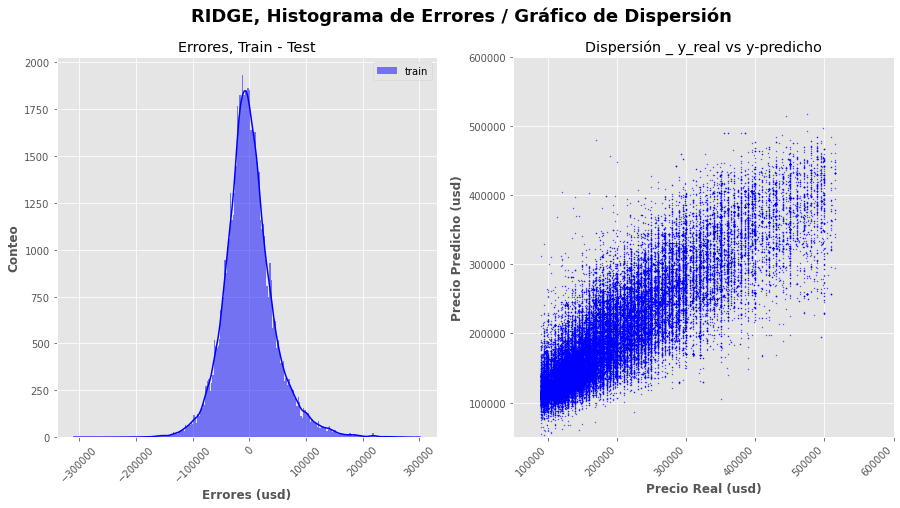

In [ ]:
#Importamos librerías:
import matplotlib.pyplot as plt
import seaborn as sns

y_train = y
y_pred = y_pred

plt.figure(figsize = (15,7))
plt.suptitle("RIDGE, Histograma de Errores / Gráfico de Dispersión", fontsize = 18, fontweight ="bold", color = "black")


plt.subplot(1,2,1)
sns.histplot(y_train - y_pred, label = 'train',  linewidth=0, color='blue', kde=True) #stat="density", kde=True, 
# sns.histplot(y_test - y_pred_test, label = 'test', color="darkred", kde=True, stat="density", linewidth=0)
plt.title("Errores, Train - Test")
plt.xlabel("Errores (usd)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
# plt.xlim(-50000,50000)
# plt.ylim(0,1000)
plt.ylabel("Conteo", fontweight = "black", fontsize = 12)
plt.ticklabel_format(style='plain')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_train, y_pred, s=1, color="blue", alpha=0.5)
# plt.scatter(y_test, y_pred_test, s=1, color="darkred", alpha=0.5)
plt.title("Dispersión _ y_real vs y-predicho")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Precio Real (usd)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio Predicho (usd)", fontweight = "black", fontsize = 12)
plt.xlim(50000,600000)
plt.ylim(50000,600000)
plt.ticklabel_format(style='plain')
# plt.legend()

plt.show()

Se observa buena distribución hacia el Cero. En el gráfico de dispersión se observa el corte por debajo del mínimo en valores reales, esto debido al trato de outliers. Veamos que pasa con Lasso, spoiler alert, espero un comportamiento similar...

####*3.1.3-Reg Lasso*

#####*Puntual*

In [ ]:
#Importamos librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_modelo) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#creamos una regresion lineal:
model = Lasso(tol=0.5) #Agregado tol para evitar error de convergencia

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train_new, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('Regresión Lineal Lasso grado 4:')
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
grl_mae_3 = ("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd')
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')
rl_r2_3 = ("{:.2f}".format(scores['test_r2'].mean()*100))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Regresión Lineal Lasso grado 4:
# X_train:  (55286, 11)
# X_train_new:  (55286, 1364)
# MAE: 36437 usd
# RMSE: 49678 usd
# R2: 70.01 %
# Duration:  0:00:04.315966

# Regresión Lineal Lasso grado 4:
# X_train:  (66435, 14)
# X_train_new:  (66435, 3059)
# MAE: 35966 usd
# RMSE: 48952 usd
# R2: 69.63 %
# Duration:  0:00:16.315049

Regresión Lineal Lasso grado 4:
X_train:  (66435, 14)
X_train_new:  (66435, 3059)
MAE: 35966 usd
RMSE: 48952 usd
R2: 69.63 %
Duration:  0:00:16.315049


Se tienen 32.000 dólares de MAE con validación cruzada.\
Veamos como se puede optimizar este modelo....

#####*Optimizando*

Revisemos cuales son sus hiperparámetros:

In [ ]:
from sklearn.linear_model import Ridge, Lasso
test = Lasso()
test.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Hagamos optimazación sobre regresión de Ridge y Lasso..

Random Search Lasso:

In [ ]:
#Importamos librerías:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el modelo objeto:
lasso = Lasso()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_modelo) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#Asignamos las variables:
X_train = X_train_new
y_train = y_modelo

# Creamos una grilla:
param_dist = {'alpha': np.linspace(0.01, 1000, num=50),
              'fit_intercept': [True, False], 
              'tol':np.linspace(0.5, 100, num=20)}

#Corremos el Random Search:
model = RandomizedSearchCV(lasso, param_distributions = param_dist, n_iter=100, random_state=1984, cv=5, scoring="neg_mean_absolute_error")

# Ajustamos el modelo
model.fit(X_train, y_train)

# Obtenemos mejores combinaciones:
print('Random Search Lasso, grado 4:')
print('X_modelo: ', (X_modelo.shape))
print('X_train_new: ', (X_train_new.shape))
print("Mejores Parámetros: "+ str(model.best_params_))
print('Mejor MAE: '+ str("{:.0f}".format((model.best_score_)*(-1)) + ' usd'))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Random Search Lasso, grado 4:
# X_modelo:  (55286, 11)
# X_train_new:  (55286, 1364)
# Mejores Parámetros: {'tol': 0.5, 'fit_intercept': True, 'alpha': 326.5373469387755}
# Mejor MAE: 37181 usd
# Duration:  0:06:50.486518
# {'alpha': np.linspace(0.01, 1000, num=50),
#               'fit_intercept': [True, False], 
#               'tol':np.linspace(0.5, 100, num=20)}
# No me gusto que tarde menos...

# 4-nov
# Random Search Lasso, grado 4:
# X_modelo:  (66435, 14)
# X_train_new:  (66435, 3059)
# Mejores Parámetros: {'tol': 0.5, 'fit_intercept': True, 'alpha': 326.5373469387755}
# Mejor MAE: 36816 usd
# Duration:  0:38:34.149555

Random Search Lasso, grado 4:
X_modelo:  (66435, 14)
X_train_new:  (66435, 3059)
Mejores Parámetros: {'tol': 0.5, 'fit_intercept': True, 'alpha': 326.5373469387755}
Mejor MAE: 36816 usd
Duration:  0:38:34.149555


Grid Search Lasso:

In [ ]:
#Importamos librerías:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el modelo objeto:
lasso = Lasso(fit_intercept=True)

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_modelo) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#Asignamos las variables:
X_train = X_train_new
y_train = y_modelo

param_grid = {'alpha': np.linspace(310, 346, num=30),
              'tol':np.linspace(0.1, 5, num=30)}

#Corremos el GridSearch:
model = GridSearchCV(lasso, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error")

# Ajustamos el modelo
model.fit(X_train, y_train)

# Obtenemos mejores combinaciones:
print('Grid Search Lasso, grado 4:')
print('X_modelo: ', (X_modelo.shape))
print('X_train_new: ', (X_train.shape))
print("Mejores Parámetros: "+ str(model.best_params_))
print('Mejor MAE: '+ str("{:.0f}".format((model.best_score_)*(-1)) + ' usd'))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

#************************* RESULTADO *************************
# Iteration 1:
# Grid Search Lasso, grado 4:
# X_modelo:  (55286, 11)
# X_train_new:  (55286, 1364)
# Mejores Parámetros: {'alpha': 11.0, 'tol': 47.0}
# Mejor MAE: 37572 usd
# Duration:  0:43:25.151411
# param_grid = {'alpha': np.linspace(11, 31, num=20),
#               'tol':np.linspace(47, 67, num=20)}

#####*Optimizado*

Optiminzado Lasso. Primer gran bloque: importación, preprocesamiento y separación:

In [ ]:
#Se importan módulos:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None  # default='warn'

#Además se establece un estilo de colores para todos los gráficos:
plt.style.use('ggplot')

#Contactamos con drive:
drive.mount('/content/drive', force_remount=True)

#Creamos el DF "ar_properati_db":
ar_properati = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Acamica_Data Science Course/Datasets/DS_Proyecto_01_Datos_Properati.csv')

print(" ")
print("ORIGINAL:")

#Revisamos las primeras 5 instancias:
print("ar_properati:", ar_properati.shape)

#Cambiamos nombres:
ar_properati.rename({'l2': 'zona'}, axis=1, inplace=True)

#Creamos el dataframe fitrando por los criterios de los outliers
df = ar_properati
df2 = df.loc[           (df['rooms'].between(1,7)) & 
                        (df['bedrooms'].between(1,6)) & 
                        (df['bathrooms'].between(1,4)) & 
                        (df['surface_total'].between(39,204)) & 
                        (df['surface_covered'].between(36,174)) & 
                        (df['lat'].between(-37,-32)) & 
                        (df['lon'].between(-60,-56)) & 
                        ((df['property_type'] == 'Departamento') | (df['property_type'] == 'Casa') | (df['property_type'] == 'PH')) &
                        (df['price'].between(90000,517000)),['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','zona','price']]
print("df2: Outliers/columnas innecesarias:", df2.shape)

print(" ")
print("SEPARACION DE DATASETS (10%):")


#Separamos en dos datasets:
df_ML, df_hold_out = train_test_split(df2, test_size=0.10)
print("df_ML", df_ML.shape)
print("df_hold_out", df_hold_out.shape)

#*****************************************************************************#
print(" ")
print("MODELOS:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_ML[cols_to_scale] = scaler.fit_transform(df_ML[cols_to_scale])
print("df_ML Escalado:", df_ML.shape)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['zona'])
print("df_ML Escalado + Hot_Enc Zona:", df_ML.shape)

df_ML = df_ML.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_ML.pop("price")
df_ML.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['property_type'])
print("df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_ML.shape)

df_ML = df_ML.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_ML.pop("price")
df_ML.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras para modelos:
X= df_ML.drop("price", axis=1)
print("X:", X.shape)
#Creando dataframe de variable a predecir:
y = df_ML["price"]
print("y:", y.shape)

#*****************************************************************************#
#Preparando Hold Out para que tenga las mismas propiedades que el train
print(" ")
print("HOLD OUT:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_hold_out[cols_to_scale] = scaler.fit_transform(df_hold_out[cols_to_scale])
print("df_hold_out Escalado:", df_hold_out.shape)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['zona'])
print("df_hold_out Escalado + Hot_Enc Zona:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_hold_out.pop("price")
df_hold_out.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['property_type'])
print("df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_hold_out.pop("price")
df_hold_out.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras Hold Out:
X_hold_out = df_hold_out.drop("price", axis=1)
print("X_hold_out:", X_hold_out.shape)
#Creando dataframe de variable a predecir:
y_hold_out = df_hold_out["price"]
print("y_hold_out:", y_hold_out.shape)

Mounted at /content/drive
 
ORIGINAL:
ar_properati: (146660, 19)
df2: Outliers/columnas innecesarias: (73817, 10)
 
SEPARACION DE DATASETS (10%):
df_ML (66435, 10)
df_hold_out (7382, 10)
 
MODELOS:
df_ML Escalado: (66435, 10)
df_ML Escalado + Hot_Enc Zona: (66435, 13)
df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (66435, 15)
X: (66435, 14)
y: (66435,)
 
HOLD OUT:
df_hold_out Escalado: (7382, 10)
df_hold_out Escalado + Hot_Enc Zona: (7382, 13)
df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (7382, 15)
X_hold_out: (7382, 14)
y_hold_out: (7382,)


Optimizado Lasso. Segundo gran bloque: Aplicando modelo, obteniendo métrica:

In [ ]:
#Importamos librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Creamos el objeto para transformar los features a elementos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)#It’s important to note that we set include_bias to False. That is because we do not need an intercept column, the regression model itself will include one.
# poly= PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C')

#Asignamos la variable y:
X_train = X
y_train = y

#Obtenemos nuevos features polinómicos:
X_train_new = poly.fit_transform(X_train) #Averguar que es mejor, transformar sobre todo X y despues dividir, o dividir primero, entrenar con train y en caso de querar utilizar test solo transformar???

#creamos una regresion lineal:
model = Lasso(alpha=11, tol=47, fit_intercept=True)

#Obtenemos predicciones:
model.fit(X_train_new,y_train)
y_pred = model.predict(X_train_new)

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train_new, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('Lasso Optimizado, grado 4:')
print('X_train: ', (X_train.shape))
print('X_train_new: ', (X_train_new.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
grl_mae_3 = ("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd')
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')
rl_r2_3 = ("{:.2f}".format(scores['test_r2'].mean()*100))

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

Lasso Optimizado, grado 4:
X_train:  (66435, 14)
X_train_new:  (66435, 3059)
MAE: 37198 usd
RMSE: 50461 usd
R2: 67.68 %
Duration:  0:00:19.124485


Recopilemos en ula tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Pol Feat","Ridge","Lasso"],
"MAE":              ["-","-","36 K","33 K","37 K"],
"RMSE":              ["120/140 k","39 k","50 K","47 K","50 K"], 
"R2 Ajus (%)":      [82,80,68,72,67],
"Comentarios":      [

"Depth 10, Sprint 01",
"Depth 10, Sprint 01 con Transf",
"Grado 2, Sin regularizar",
"Grado 4, Optimizado",
"Grado 4, Optimizado"

]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,-,120/140 k,82,"Depth 10, Sprint 01"
1,DT,-,39 k,80,"Depth 10, Sprint 01 con Transf"
2,Pol Feat,36 K,50 K,68,"Grado 2, Sin regularizar"
3,Ridge,33 K,47 K,72,"Grado 4, Optimizado"
4,Lasso,37 K,50 K,67,"Grado 4, Optimizado"


Tal como lo esparaba, dio muy similar a Ridge. No se observa mejora en realción al arbol de 10 con data preprocesad. Veamos el gráfico de errores...

Optimizado Lasso. Tercer gran bloque: Graficando:

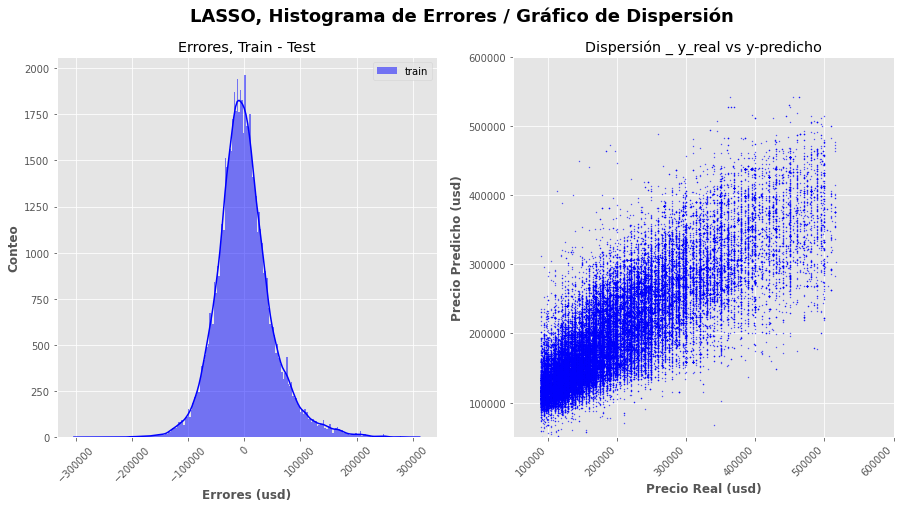

In [ ]:
#Importamos librerías:
import matplotlib.pyplot as plt
import seaborn as sns

y_train = y
y_pred = y_pred

plt.figure(figsize = (15,7))
plt.suptitle("LASSO, Histograma de Errores / Gráfico de Dispersión", fontsize = 18, fontweight ="bold", color = "black")


plt.subplot(1,2,1)
sns.histplot(y_train - y_pred, label = 'train',  linewidth=0, color='blue', kde=True) #stat="density", kde=True, 
# sns.histplot(y_test - y_pred_test, label = 'test', color="darkred", kde=True, stat="density", linewidth=0)
plt.title("Errores, Train - Test")
plt.xlabel("Errores (usd)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
# plt.xlim(-50000,50000)
# plt.ylim(0,1000)
plt.ylabel("Conteo", fontweight = "black", fontsize = 12)
plt.ticklabel_format(style='plain')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_train, y_pred, s=1, color="blue", alpha=0.5)
# plt.scatter(y_test, y_pred_test, s=1, color="darkred", alpha=0.5)
plt.title("Dispersión _ y_real vs y-predicho")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Precio Real (usd)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio Predicho (usd)", fontweight = "black", fontsize = 12)
plt.xlim(50000,600000)
plt.ylim(50000,600000)
plt.ticklabel_format(style='plain')
# plt.legend()

plt.show()

Buena distribución hacia el cero. Igual que en el gráfico de Ridge.

Veamos que ocurre con XG-Boost:

##3.2-XG Boost

####Puntual

Corremos un modelo puntual de XGBoost, con la idea de conocer un resultado primario, podríamos decir que un Benchmark del XGBoost.

In [ ]:
#Importamos librerías:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Creamos el objeto:
model = XGBRegressor(objective ='reg:squarederror')
# model = XGBRegressor(objective ='reg:linear')
# model = XGBRegressor(objective ='rank:pairwise')

#Se entrena sobre train:
model.fit(X_train,y_train)

#Se predice sobretrain y sobre hold-out
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_hold_out)

#Obtenemos las métricas para la evaluación:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print('Evaluación de XGBoost default:')
print(' ')

#...sobre Train:
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)
print('Sobre train:')
print('MAE: '+ str("{:.0f}".format(train_mae) + ' usd'))
print('RMSE: '+ str("{:.0f}".format(train_rmse) + ' usd'))
print('R2: '+ str("{:.2f}".format(train_r2*100) + ' %'))

print(' ')

#...sobre Test:
test_mae = mean_absolute_error(y_hold_out, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_hold_out, y_pred_test))
test_r2 = r2_score(y_hold_out, y_pred_test)
print('Sobre test:')
print('MAE: '+ str("{:.0f}".format(test_mae) + ' usd'))
print('RMSE: '+ str("{:.0f}".format(test_rmse) + ' usd'))
print('R2: '+ str("{:.2f}".format(test_r2*100) + ' %'))

Evaluación de XGBoost default:
 
Sobre train:
MAE: 31658 usd
RMSE: 43286 usd
R2: 77.25 %
 
Sobre test:
MAE: 32053 usd
RMSE: 43647 usd
R2: 76.98 %


Se tienen 32.000 dólares de MAE con validación cruzada.\
Veamos como se puede optimizar este modelo....

####Optimizando

Revisemos cuales son sus hiperparámetros:

In [ ]:
# xgboost = XGBRegressor()
# xgboost.get_xgb_params()

Mastering XGBoost: Hyper-parameter Tuning & Optimization

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76





1.   Number of sub-trees: (n_estimators)
2.   Maximum tree depth (max_depth)
3.   Learning rate (learning_rate)
4.   L1 (reg_alpha) , L2 (reg_lambda)
5.   Complexity control (gamma=γ)
6.   Minimum child weight (min_child_weight)







Corremos un **Random Search** en base al diccionario anterior:

In [ ]:
#Importamos librerías:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime
import numpy as np

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Creamos el modelo objeto:
xgboost = XGBRegressor(objective="reg:squarederror")

#Creamos la diccionario para la busqueda aletarioa:
param_dist = {'n_estimators': np.arange(140,160)
              ,'max_depth': np.arange(20,34)
              ,'learning_rate':np.linspace(0.01,1,num=5)
              }

#Se genera el modelo aleatorio:
model = RandomizedSearchCV(xgboost, param_distributions = param_dist, random_state=1984, cv=5, n_iter=20, scoring="neg_mean_absolute_error")

# Entrenamos el modelo con la grilla definida arriba:
model.fit(X_train, y_train)

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('duration: ', duration)

# Obtenemos mejores combinaciones:
print("Mejores Parámetros: "+ str(model.best_params_))
print("Mejor MAE: "+ "{:.0f}".format((model.best_score_)) + ' usd')


#************************* REGISTRO DE ITERACIONES *************************
#Iteración#1:
# Num de iteraciones = 100
#n_estimators = 141
#Max Depth = 199  
#MAE = 14.000
#Tiempo: ?

#Iteración#2:
# Num de iteraciones = 2
#n_estimators = 22
#Max Depth = 100
#Learning rate = 0.1
#MAE = 27724
#Tiempo: 32 segs

#Iteración#3:
# Num de iteraciones = 20
#n_estimators = 148
#Max Depth = 27
#Learning rate = -
#MAE = 14400
#Tiempo: 40 mins

#Iteración#4:
# Num de iteraciones = 20
#n_estimators = 150 (140,160)
#Max Depth = 21 (20,34)
#Learning rate = 0.2575 (0.01,1,num=5)
#MAE = 14697
#Tiempo: 57 mins

KeyboardInterrupt: ignored

Se puede observar como el promedio del error absoluto bajó de 32.000 dólares a 14.000 dólares, una disminución del 43%.

\
A continuación, utilizando **Grid Search** se intenta tomar un mejor punto en base al resultado anterior.

In [ ]:
#Importamos librerías:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime
import numpy as np

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Asignamos las variables:
X_train = X_modelo
y_train = y_modelo

#Creamos el modelo objeto:
xgboost = XGBRegressor(objective="reg:squarederror", learning_rate=0.2575)

# # Creamos una grilla:
param_grid = {'n_estimators': np.arange(149,152)
              ,'max_depth': np.arange(20,23)
              # ,'learning_rate': (0.2575)
              }
# np.arange(20,23)
# np.linspace(0.1,0.4,num=10)

#Corremos el GridSearch:
model = GridSearchCV(xgboost, param_grid=param_grid, cv=5, scoring = 'neg_mean_absolute_error')

# Entrenamos: el modelo con la grilla definida arriba:
model.fit(X_train, y_train)

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('duration: ', duration)

# Obtenemos mejores combinaciones:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_))

#************************* REGISTRO DE ITERACIONES *************************
#Iteración#1:
#n_estimators = 201
#n_jobs = 1
#MAE = 41900
#Tiempo: -

#Iteración#2:
#n_estimators = (147,152)
#Max Depth = (21,28)
#Learning rate = (0.1,0.4,num=10)
#MAE = -
#Tiempo: Infinite

#Iteración#3:
#n_estimators = 151 (149,152)
#Max Depth = 20 (20,23)
#Learning rate = (0.2575)
#MAE = 14665
#Tiempo: 20 mins

KeyboardInterrupt: ignored

No se observa gran diferencia entre el resultado del random search y del grid search, por lo que se presume que la cambinación del random ya había sido la mejor.

####Puntual Optimizado

En base a lo anterior se define que la mejor selección de hiperparámetros es:\
\
**Modelo: XGBoost**
- A : Cantidad de Estimadores = 151
- B : Máxima Profundidad = 20
- C : Learning Rate = 0.275
- D : MAE obtenido: 14.665 dólares

Optiminzado XGBoost. Primer gran bloque: importación, preprocesamiento y separación:

In [ ]:
#Se importan módulos:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None  # default='warn'

#Además se establece un estilo de colores para todos los gráficos:
plt.style.use('ggplot')

#Contactamos con drive:
drive.mount('/content/drive', force_remount=True)

#Creamos el DF "ar_properati_db":
ar_properati = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Acamica_Data Science Course/Datasets/DS_Proyecto_01_Datos_Properati.csv')

print(" ")
print("ORIGINAL:")

#Revisamos las primeras 5 instancias:
print("ar_properati:", ar_properati.shape)

#Cambiamos nombres:
ar_properati.rename({'l2': 'zona'}, axis=1, inplace=True)

#Creamos el dataframe fitrando por los criterios de los outliers
df = ar_properati
df2 = df.loc[           (df['rooms'].between(1,7)) & 
                        (df['bedrooms'].between(1,6)) & 
                        (df['bathrooms'].between(1,4)) & 
                        (df['surface_total'].between(39,204)) & 
                        (df['surface_covered'].between(36,174)) & 
                        (df['lat'].between(-37,-32)) & 
                        (df['lon'].between(-60,-56)) & 
                        ((df['property_type'] == 'Departamento') | (df['property_type'] == 'Casa') | (df['property_type'] == 'PH')) &
                        (df['price'].between(90000,517000)),['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','zona','price']]
print("df2: Outliers/columnas innecesarias:", df2.shape)

print(" ")
print("SEPARACION DE DATASETS (10%):")


#Separamos en dos datasets:
df_ML, df_hold_out = train_test_split(df2, test_size=0.10)
print("df_ML", df_ML.shape)
print("df_hold_out", df_hold_out.shape)

#*****************************************************************************#
print(" ")
print("MODELOS:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_ML[cols_to_scale] = scaler.fit_transform(df_ML[cols_to_scale])
print("df_ML Escalado:", df_ML.shape)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['zona'])
print("df_ML Escalado + Hot_Enc Zona:", df_ML.shape)

df_ML = df_ML.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_ML.pop("price")
df_ML.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['property_type'])
print("df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_ML.shape)

df_ML = df_ML.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_ML.pop("price")
df_ML.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras para modelos:
X= df_ML.drop("price", axis=1)
print("X:", X.shape)
#Creando dataframe de variable a predecir:
y = df_ML["price"]
print("y:", y.shape)

#*****************************************************************************#
#Preparando Hold Out para que tenga las mismas propiedades que el train
print(" ")
print("HOLD OUT:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_hold_out[cols_to_scale] = scaler.fit_transform(df_hold_out[cols_to_scale])
print("df_hold_out Escalado:", df_hold_out.shape)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['zona'])
print("df_hold_out Escalado + Hot_Enc Zona:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_hold_out.pop("price")
df_hold_out.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['property_type'])
print("df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_hold_out.pop("price")
df_hold_out.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras Hold Out:
X_hold_out = df_hold_out.drop("price", axis=1)
print("X_hold_out:", X_hold_out.shape)
#Creando dataframe de variable a predecir:
y_hold_out = df_hold_out["price"]
print("y_hold_out:", y_hold_out.shape)

Mounted at /content/drive
 
ORIGINAL:
ar_properati: (146660, 19)
df2: Outliers/columnas innecesarias: (73817, 10)
 
SEPARACION DE DATASETS (10%):
df_ML (66435, 10)
df_hold_out (7382, 10)
 
MODELOS:
df_ML Escalado: (66435, 10)
df_ML Escalado + Hot_Enc Zona: (66435, 13)
df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (66435, 15)
X: (66435, 14)
y: (66435,)
 
HOLD OUT:
df_hold_out Escalado: (7382, 10)
df_hold_out Escalado + Hot_Enc Zona: (7382, 13)
df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (7382, 15)
X_hold_out: (7382, 14)
y_hold_out: (7382,)


Optimizado XGBoost. Segundo gran bloque: Aplicando modelo, obteniendo métrica:

In [ ]:
#Importamos librerías:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Asignamos las variables:
X_train = X
y_train = y

#Creamos el objeto:
model = XGBRegressor( n_estimators =  151
                      , max_depth = 20
                      , learning_rate = 0.275
                      ,objective ='reg:squarederror',
                     )

#Se entrena sobre train:
model.fit(X_train,y_train)

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('XGBoost Optimizado:')
print('X_train: ', (X_train.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

XGBoost Optimizado:
X_train:  (66435, 14)
MAE: 15371 usd
RMSE: 29059 usd
R2: 89.35 %
Duration:  0:03:30.151295


Recopilemos la información..

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Pol Feat","Ridge","Lasso","XGBoost"],
"MAE":              ["-","-","36 K","33 K","37 K","15 K"],
"RMSE":              ["120/140 k","39 k","50 K","47 K","50 K","29 K"], 
"R2 Ajus (%)":      [82,80,68,72,67,89],
"Comentarios":      [

"Depth 10, Sprint 01",
"Depth 10, Sprint 01 con Transf",
"Grado 2, Sin regularizar",
"Grado 4, Optimizado",
"Grado 4, Optimizado",
"Optimizado"

]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,-,120/140 k,82,"Depth 10, Sprint 01"
1,DT,-,39 k,80,"Depth 10, Sprint 01 con Transf"
2,Pol Feat,36 K,50 K,68,"Grado 2, Sin regularizar"
3,Ridge,33 K,47 K,72,"Grado 4, Optimizado"
4,Lasso,37 K,50 K,67,"Grado 4, Optimizado"
5,XGBoost,15 K,29 K,89,Optimizado


De los tres modelos aplicados, éste es el mejor, presentadno un RMSE de 29 k usd, siendo el más bajo conseguido actualmente\ 
Para el gráfico de errores, vamos a aplicar de una vez las predicciones sobre Hold-Out, ya que este modelo es el mejor de los aplicados. A continuación hagamos las predicciones...

In [ ]:
#Se predice sobretrain y sobre hold-out
y_pred_train = model.predict(X_train)
y_pred_hold_out = model.predict(X_hold_out)

#Obtenemos las métricas para la evaluació
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print('Evaluación de XGBoost en Hold Out:')
print(' ')

#...sobre Train:
train_mae = mean_absolute_error(y_hold_out, y_pred_hold_out)
train_rmse = np.sqrt(mean_squared_error(y_hold_out, y_pred_hold_out))
train_r2 = r2_score(y_hold_out, y_pred_hold_out)
print('Sobre train:')
print('MAE: '+ str("{:.0f}".format(train_mae) + ' usd'))
print('RMSE: '+ str("{:.0f}".format(train_rmse) + ' usd'))
print('R2: '+ str("{:.2f}".format(train_r2*100) + ' %'))

Evaluación de XGBoost en Hold Out:
 
Sobre train:
MAE: 21612 usd
RMSE: 33751 usd
R2: 86.06 %


Recopilemos la informacion del Hold Out en la tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Pol Feat","Ridge","Lasso","XGBoost","XGBoost"],
"MAE":              ["-","-","36 K","33 K","37 K","15 K","25 K"],
"RMSE":              ["120/140 k","39 k","50 K","47 K","50 K","29 K","37 K"], 
"R2 Ajus (%)":      [82,80,68,72,67,89,81],
"Comentarios":      [

"Depth 10, Sprint 01",
"Depth 10, Sprint 01 con Transf",
"Grado 2, Sin regularizar",
"Grado 4, Optimizado",
"Grado 4, Optimizado",
"Optimizado",
"Sobre Hold Out"

]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,-,120/140 k,82,"Depth 10, Sprint 01"
1,DT,-,39 k,80,"Depth 10, Sprint 01 con Transf"
2,Pol Feat,36 K,50 K,68,"Grado 2, Sin regularizar"
3,Ridge,33 K,47 K,72,"Grado 4, Optimizado"
4,Lasso,37 K,50 K,67,"Grado 4, Optimizado"
5,XGBoost,15 K,29 K,89,Optimizado
6,XGBoost,25 K,37 K,81,Sobre Hold Out


Da valores aceptables sobre Hold Out,el RMSE de 37 K esta mucho mejor que los modelos anteriores, especialmente considerando que el Hold Out es una data desconocida para el modelo. Ahora si, veamos los gráficos de errores...

Optimizado XGBoost. Tercer gran bloque: Graficando:

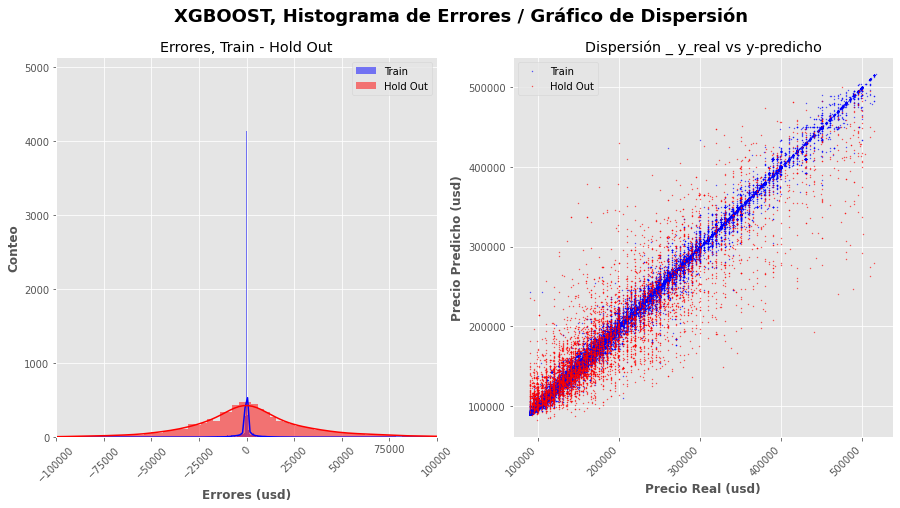

In [ ]:
#Importamos librerías:
import matplotlib.pyplot as plt
import seaborn as sns

y_train = y
y_pred = y_pred_train

plt.figure(figsize = (15,7))
plt.suptitle("XGBOOST, Histograma de Errores / Gráfico de Dispersión", fontsize = 18, fontweight ="bold", color = "black")


plt.subplot(1,2,1)
sns.histplot(y_train - y_pred, label = 'Train',  linewidth=0, color='blue', kde=True) #stat="density", kde=True, 
sns.histplot(y_hold_out - y_pred_hold_out, label = 'Hold Out',  linewidth=0, color='red', kde=True) #stat="density", kde=True, 
plt.title("Errores, Train - Hold Out")
plt.xlabel("Errores (usd)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.xlim(-100000,100000)
# plt.ylim(0,1000)
plt.ylabel("Conteo", fontweight = "black", fontsize = 12)
plt.ticklabel_format(style='plain')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_train, y_pred, s=1, color="blue", alpha=0.5, label = 'Train')
plt.scatter(y_hold_out, y_pred_hold_out, s=1, color="red", alpha=0.5, label = 'Hold Out')
plt.title("Dispersión _ y_real vs y-predicho")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Precio Real (usd)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio Predicho (usd)", fontweight = "black", fontsize = 12)
# plt.xlim(50000,600000)
# plt.ylim(50000,600000)
plt.ticklabel_format(style='plain')
plt.legend()

plt.show()

Se observa como la distribución se encuentra completamente concetrada cerca del 0, además en el gráfico de la derecha se observa comportamiento casi lineal de lo predicho versus lo real. Esto habla muy bien del ajuste del modelo a este dataset. Los valores de Hold Out son muy buenos para ser data desconocida por el modelo.

**Después de haber trabajado con tres modelos, se llega a la conclusión que el mejor modelo de ste grupo es XGBoost.**

Revisemos la importancia de los features en este modelo XGBoost:

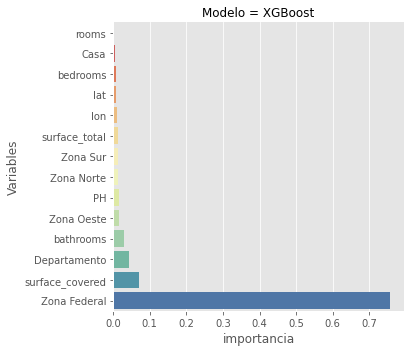

In [ ]:

sns.catplot(data = pd.concat([
                pd.DataFrame({'Modelo': 'XGBoost', "Variables": X.columns, "importancia": model.feature_importances_}).sort_values("importancia", ascending= True),
                 ]),
            y= 'Variables',
            x= 'importancia',
            kind= 'bar',
            col= 'Modelo',
            col_wrap=2, 
            palette= "Spectral")


Se observa como Zona Federal jugo un papel fundamental, esto por tener una mayor cantidad de propiedades, luego le sigue la superficie y de tercero el tipo de departamento. En el caso de Zona Federal y Tipo de Propiedad Departamento, cobran importancia por la cantidad de instancias en estas categorías, sin embargo para Superficie Cubierta y cantidad de Baños la importancia radica en una genuina correlación con la predicción de los precios.

---

<br />

# 4.-REDUCCION DE DIMENSIONALIDAD
<br />

---

**REDUCCION DE DIMENSIONALIDAD: PCA - PRINCIPAL COMPONENT ANALYSIS**

Probemos que tal nos va aplicando reduccion de dimensionalidad (PCA). Con esta transformación se pretende minimizar la varianza obtenida en los modelos anteriores.

\
Recordemos el dataset utilizado en ls modelos:

In [ ]:
#Se importan módulos:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None  # default='warn'

#Además se establece un estilo de colores para todos los gráficos:
plt.style.use('ggplot')

#Contactamos con drive:
drive.mount('/content/drive', force_remount=True)

#Creamos el DF "ar_properati_db":
ar_properati = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Acamica_Data Science Course/Datasets/DS_Proyecto_01_Datos_Properati.csv')

print(" ")
print("ORIGINAL:")

#Revisamos las primeras 5 instancias:
print("ar_properati:", ar_properati.shape)

#Cambiamos nombres:
ar_properati.rename({'l2': 'zona'}, axis=1, inplace=True)

#Creamos el dataframe fitrando por los criterios de los outliers
df = ar_properati
df2 = df.loc[           (df['rooms'].between(1,7)) & 
                        (df['bedrooms'].between(1,6)) & 
                        (df['bathrooms'].between(1,4)) & 
                        (df['surface_total'].between(39,204)) & 
                        (df['surface_covered'].between(36,174)) & 
                        (df['lat'].between(-37,-32)) & 
                        (df['lon'].between(-60,-56)) & 
                        ((df['property_type'] == 'Departamento') | (df['property_type'] == 'Casa') | (df['property_type'] == 'PH')) &
                        (df['price'].between(90000,517000)),['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','zona','price']]
print("df2: Outliers/columnas innecesarias:", df2.shape)

print(" ")
print("SEPARACION DE DATASETS (10%):")


#Separamos en dos datasets:
df_ML, df_hold_out = train_test_split(df2, test_size=0.10)
print("df_ML", df_ML.shape)
print("df_hold_out", df_hold_out.shape)

#*****************************************************************************#
print(" ")
print("MODELOS:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_ML[cols_to_scale] = scaler.fit_transform(df_ML[cols_to_scale])
print("df_ML Escalado:", df_ML.shape)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['zona'])
print("df_ML Escalado + Hot_Enc Zona:", df_ML.shape)

df_ML = df_ML.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_ML.pop("price")
df_ML.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_ML = pd.get_dummies(df_ML, columns = ['property_type'])
print("df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_ML.shape)

df_ML = df_ML.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_ML.pop("price")
df_ML.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras para modelos:
X= df_ML.drop("price", axis=1)
print("X:", X.shape)
#Creando dataframe de variable a predecir:
y = df_ML["price"]
print("y:", y.shape)

#*****************************************************************************#
#Preparando Hold Out para que tenga las mismas propiedades que el train
print(" ")
print("HOLD OUT:")

#Columnas a Escalar:
cols_to_scale = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

#Se crea objeto:
scaler = StandardScaler()

#Se entrena y transforma:
#Nota: se puede hacer en dos pasos, el primero seria fit y el segundo transform. A continuación se muestra en un solo paso con la opcion fit_transform:
df_hold_out[cols_to_scale] = scaler.fit_transform(df_hold_out[cols_to_scale])
print("df_hold_out Escalado:", df_hold_out.shape)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['zona'])
print("df_hold_out Escalado + Hot_Enc Zona:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'zona_Bs.As. G.B.A. Zona Norte':'Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste':'Zona Oeste','zona_Bs.As. G.B.A. Zona Sur':'Zona Sur', 'zona_Capital Federal':'Zona Federal'})

#Moviendo 
column_to_move = df_hold_out.pop("price")
df_hold_out.insert(12, "price", column_to_move)

#Apliquemos one-hot-encoding con get dummies:
df_hold_out = pd.get_dummies(df_hold_out, columns = ['property_type'])
print("df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type:", df_hold_out.shape)

df_hold_out = df_hold_out.rename(columns={'property_type_Casa':'Casa', 'property_type_Departamento':'Departamento','property_type_PH':'PH'})

column_to_move = df_hold_out.pop("price")
df_hold_out.insert(14, "price", column_to_move)

#Creando dataframe de variables predictoras Hold Out:
X_hold_out = df_hold_out.drop("price", axis=1)
print("X_hold_out:", X_hold_out.shape)
#Creando dataframe de variable a predecir:
y_hold_out = df_hold_out["price"]
print("y_hold_out:", y_hold_out.shape)

Mounted at /content/drive
 
ORIGINAL:
ar_properati: (146660, 19)
df2: Outliers/columnas innecesarias: (73817, 10)
 
SEPARACION DE DATASETS (10%):
df_ML (66435, 10)
df_hold_out (7382, 10)
 
MODELOS:
df_ML Escalado: (66435, 10)
df_ML Escalado + Hot_Enc Zona: (66435, 13)
df_ML Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (66435, 15)
X: (66435, 14)
y: (66435,)
 
HOLD OUT:
df_hold_out Escalado: (7382, 10)
df_hold_out Escalado + Hot_Enc Zona: (7382, 13)
df_hold_out Escalado + Hot_Enc Zona + Hot_Enc Prop Type: (7382, 15)
X_hold_out: (7382, 14)
y_hold_out: (7382,)


Tomemos el dataset:

In [ ]:
X.sample()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Zona Norte,Zona Oeste,Zona Sur,Zona Federal,Casa,Departamento,PH
31920,0.119339,0.245972,-1.026541,-1.136323,-0.705214,-1.183003,-1.16291,0,0,0,1,0,0,1


Aplicamos PCA sobre este dataset:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)

In [ ]:
X_nuevo = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
cumulative_variance

array([0.488, 0.734, 0.818, 0.883, 0.917, 0.945, 0.968, 0.982, 0.99 ,
       0.996, 1.   , 1.002, 1.002, 1.002])

Veamos los nuevos vectores resultantes...

In [ ]:
# plt.plot(pca.explained_variance_ratio_)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))

De acuerdo a la información anterior, vemos que si tomamos 8 componentes principales, tenemos el 98% de varianza.

Ahora hagámoslo en base a 8...

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=8)

X_nuevo2 = pca2.fit_transform(X)
explained_variance2 = pca2.explained_variance_ratio_
cumulative_variance2 = np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=3))
cumulative_variance2

array([0.488, 0.734, 0.818, 0.883, 0.917, 0.945, 0.968, 0.982])

Convirtiendo las nuevas variables en datframe:

In [ ]:
df_pca = pd.DataFrame(X_nuevo2)
df_pca.sample(3)

,0,1,2,3,4,5,6,7
42896,1.424302,-0.056355,0.127159,-1.222988,0.444883,-0.090624,0.238943,0.111820
34073,-2.143404,0.318293,-0.084746,0.181909,0.214867,-0.531370,-1.212685,-0.332772
13706,0.229937,0.234920,0.851803,-0.374150,0.114132,-0.131565,0.068270,0.061203


Traigamos XGBoost pero ahora usemos la X del pca:

In [ ]:
#Importamos librerías:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
import datetime

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#Asignamos las variables:
X_train = X_nuevo2
y_train = y

#Creamos el objeto:
model = XGBRegressor( n_estimators =  151
                      , max_depth = 20
                      , learning_rate = 0.275
                      ,objective ='reg:squarederror',
                     )

#Se entrena sobre train:
model.fit(X_train,y_train)

#Creamos una lista con las métricas de interés:
scoring = {'neg_mae': 'neg_mean_absolute_error',
           'neg_rmse': 'neg_root_mean_squared_error',
          'r2': 'r2'}

#Creamos el train-test con validación cruzada:
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

# Obtenemos las métricas de interés:
print('XGBoost Optimizado:')
print('X_train: ', (X_train.shape))
print('MAE: '+ str("{:.0f}".format(scores['test_neg_mae'].mean()*(-1)) + ' usd'))
print('RMSE: '+ str("{:.0f}".format(scores['test_neg_rmse'].mean()*(-1)) + ' usd'))
print('R2: '+ str("{:.2f}".format(scores['test_r2'].mean()*100)) + ' %')

#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)

XGBoost Optimizado:
X_train:  (66435, 8)
MAE: 16645 usd
RMSE: 31979 usd
R2: 87.10 %
Duration:  0:04:13.535331


Recopilamos en la tabla...

In [ ]:
tabla_resumen= {
"MODELO":           ["DT","DT","Pol Feat","Ridge","Lasso","XGBoost","XGBoost","XGBoost"],
"MAE":              ["-","-","36 K","33 K","37 K","15 K","25 K","16 K"],
"RMSE":              ["120/140 k","39 k","50 K","47 K","50 K","29 K","37 K","31 K"], 
"R2 Ajus (%)":      [82,80,68,72,67,89,81,87],
"Comentarios":      [

"Depth 10, Sprint 01",
"Depth 10, Sprint 01 con Transf",
"Grado 2, Sin regularizar",
"Grado 4, Optimizado",
"Grado 4, Optimizado",
"Optimizado",
"Sobre Hold Out",
"PCA de 14 a 8 componentes"

]
                }
tabla_resumen_df = pd.DataFrame(tabla_resumen)
tabla_resumen_df

,MODELO,MAE,RMSE,R2 Ajus (%),Comentarios
0,DT,-,120/140 k,82,"Depth 10, Sprint 01"
1,DT,-,39 k,80,"Depth 10, Sprint 01 con Transf"
2,Pol Feat,36 K,50 K,68,"Grado 2, Sin regularizar"
3,Ridge,33 K,47 K,72,"Grado 4, Optimizado"
4,Lasso,37 K,50 K,67,"Grado 4, Optimizado"
5,XGBoost,15 K,29 K,89,Optimizado
6,XGBoost,25 K,37 K,81,Sobre Hold Out
7,XGBoost,16 K,31 K,87,PCA de 14 a 8 componentes


Se observa que no hubo mucha mejora con reducción de dimensionalidad usando PCA en comparación con el mejor resultado que había sido XGBoost Optimizado.

---

<br />

# 5.-CLUSTERING
<br />

---

Apliquemos este método no supervisado sobre las coordenadas, ya que se espera que estas hablen muy bien de algun tipo de agrupamiento.

**1- Aplicamos K-MEANS**

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

In [ ]:
# hacemos clustering para lat y lon para detectar zonas
X_clus = df_ML[['lat', 'lon']]
y_clus = df_ML['price']

print("X Cluster: ", X_clus.shape)
print("y Cluster: ", y_clus.shape)

X Cluster:  (66435, 2)
y Cluster:  (66435,)


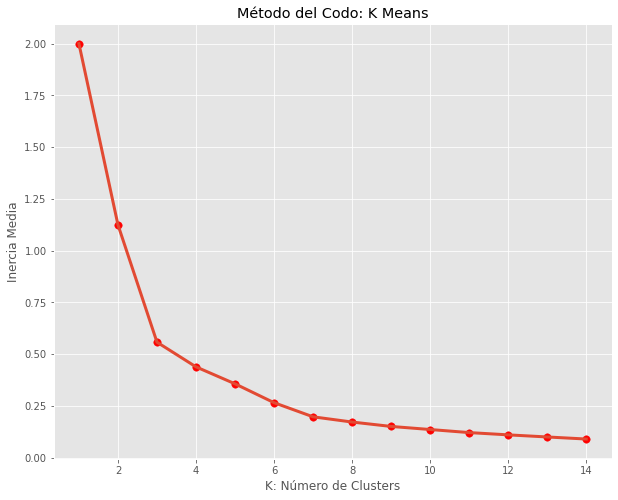

In [ ]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(1,15) 
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X_clus)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X_clus.shape[0]) # no es necesario sacar el promedio, si hacemos el grafico con la inersia completa da igual
    Sum_of_squared_distances.append(distancia_media)

plt.figure(figsize = (10,8))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('K: Número de Clusters')
plt.ylabel('Inercia Media')
plt.title('Método del Codo: K Means')

plt.show()

Grafiquemos el Silhouetten para que ayude en la interpretación del gráfico anterior...

In [ ]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,15):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X_clus)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X_clus, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,8))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('K: Número de Clusters')
plt.ylabel('Silhouette Media')
plt.title('Silhouette Media: K Means')

plt.show()

KeyboardInterrupt: ignored

Tomemos 4, basado en los gráficos anteriores...

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1984)
kmeans = kmeans.fit(X_clus)
kmeans

KMeans(n_clusters=4, random_state=1984)

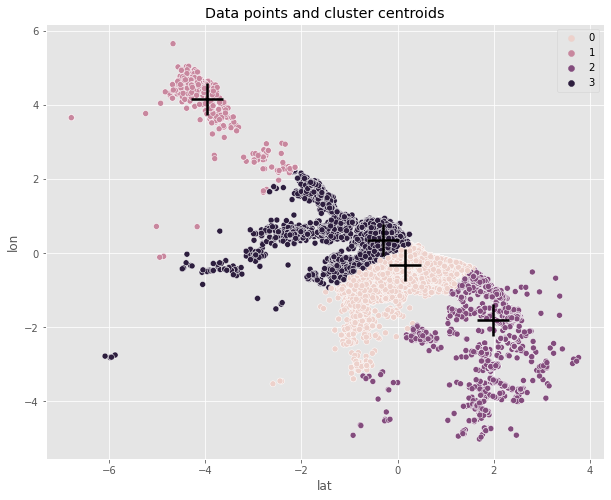

In [ ]:
# obtenemos las etiquetas y la posición de los centroides
etiquetas = kmeans.labels_
centros = kmeans.cluster_centers_
# graficamos cómo fueron las separaciones
plt.figure(figsize = (10,8))
sns.scatterplot(x=X_clus.iloc[:,0], y=X_clus.iloc[:,-1], hue=etiquetas)
sns.scatterplot(x=centros[:,0], y=centros[:,1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Observamos como Kmeans hace su mejor intento en realizar una separación de 4 zonas. Sin embargo, recordemos que las propiedades estan distribuidas en zonas unas al lado de la otra, por lo que no se podrán separar estas zonas limpiamente. En el caso del DB Scan, al considerar es densidades se espera que sea menos efectivo en este caso.

---

<br />

# 6.-CONCLUSIONES
<br />

---

-EDA: Se tomó el EDA del proyecto 1. Resaltando que en esta ocasión se agrega análisis de distribución de coordenadas, las cuales presentan valores ilógicos que son descartados en el resto del proyecto. Se siguen considerando las 4 regiones y se descartan los barrios, apoyado en que las coordenadas ya dan un aspecto numérico a la ubicación.


-EDA: Resumiendo del EDA del proyecto 1. Se tienen tres tipos de propiedades que representan el 97% de la base de datos, a saber, Departamento, Casa, PH. Además 5 características tienen nulos, estas son, Superficie Cubierta, Superficie Total, Longitud, Latitud y Cantidad de Baños.



-EDA: Del EDA del proyecto 1, se realiza la eliminación de outliers. Esto se hizo analizando los tres métodos, Z-Score, IQR y Percentiles 10/90. Para el mínimo y máximo de cada característica se tomó el outlier mas externo de estos tres métodos de forma de perder la menor cantidad de data. Además, se aplicó la lógica, como, por ejemplo, descartar negativos de cantidad de baños o espacios.

-EDA: Del sprint 01 traemos el mejor resultado, Árbol de Decisión de profundidad 10. RMSE= 130 k, R2=80%.


-PREPROCESAMIENTO: Los métodos de procesamiento que se consideraron fueron: Eliminación de Outliers (tomado del sprint 01), Hot-Encoding y Escalado. La imputación de valores nulos no se tomó ya que después de eliminar Outliers no se tienen nulos, esto da a pensar que esos nulos tal vez tengan relación directa con los Outliers lo que sería interesante indagar en otro momento. Sin embargo, en este proyecto se dedicó una parte a esto, solo con fines de practicar métodos de imputación (sobre el dataset original, sin eliminación de Outliers).

-PREPROCESAMIENTO: En el ejercicio de imputación de valores nulos, se consideró lo siguiente: Imputación por mediana para Tipos de Propiedad, Imputación por media para Longitud y Latitud, Imputación por moda para cantidad de baños.

-PREPROCESAMIENTO: Se aplicó Escalado sobre las variables numéricas, y Hot-Encoding sobre Tipo de Propiedad y Zona.

-PREPROCESAMIENTO: El mejor modelo del sprint 01 (árbol, profundidad 10). Mejoró, reduciendo un 30% el RMSE original, de 130 k usd a 40 k usd. Evidenciando la importancia del preprocesamiento en un modelado.

-MODELOS AVANZADOS: Se aplicaron modelos de Ridge, Lasso y XGBoost, observando buen comportamiento de este último, logrando RMSE de 29 K para train y 37 K para Hold Out, siendo las mejores métricas obtenidas en el desarrollo del proyecto.

-MODELOS AVANZADOS: Al analizar la importancia del mejor modelo (XGBoost Optimizado) se observó como Zona Federal y Tipo de Propiedad Departamento cobraron importancia por la cantidad de instancias en estas categorías, sin embargo, para Superficie Cubierta y cantidad de Baños la importancia radica en una genuina correlación con la predicción de los precios.

-PCA: se tuvo que reduciendo de 14 a 8 componentes se tenía una varianza del 98% del modelo original, así que se eligió este y se corrió sobre el mejor modelo hasta ese momento. Se observó un leve aumento de RMSE. Lo cual tal vez se justifique si con los 14 componentes consumiría mucho recurso.

-CLUSTERING: aplicó clustering sobre longitud y latitud. Como era de esperarse no se tuvo una división perfecta ya que todas las propiedades están distribuidas a lo largo de la región. Sin embargo, el ejercicio sirvió para conocer como se comporta este método no supervisado.
